In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hvplot.pandas

from scipy import stats
from scipy.stats import linregress

import holoviews as hv
# from holoviews import opts
# hv.extension('matplotlib')

import requests
import json
from pprint import pprint


In [7]:
#Read in UK IMD Data as a Pandas DataFrame

IMD_data = pd.read_csv("Resources/IMD_Data/IMD.csv")
IMD_data.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000001,City of London 001A,E09000001,City of London,6.208,29199,9,0.007,32831,10,...,16364,5,1.503,1615,1,1296,175,656,465,715
1,E01000002,City of London 001B,E09000001,City of London,5.143,30379,10,0.034,29901,10,...,22676,7,1.196,2969,1,1156,182,580,394,620
2,E01000003,City of London 001C,E09000001,City of London,19.402,14915,5,0.086,18510,6,...,17318,6,2.207,162,1,1350,146,759,445,804
3,E01000005,City of London 001E,E09000001,City of London,28.652,8678,3,0.211,6029,2,...,25218,8,1.769,849,1,1121,229,692,200,683
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.837,14486,5,0.117,14023,5,...,14745,5,0.969,4368,2,2040,522,1297,221,1285


In [220]:
# Analyse and reduce this DataFrame for the purpose of our analysis

print(f'UK IMD Data has {len(IMD_data.columns)} columns and {len(IMD_data)} rows\n')

# Reduce this DataFrame to Local Authority = Birmingham

IMD_Bham = IMD_data.loc[IMD_data["Local Authority District name (2019)"] == "Birmingham",:]

print(f'Birmingham IMD Data has {len(IMD_Bham.columns)} columns and {len(IMD_Bham)} rows\n\nTherefore the total number of LSOAs in Birmingham = {len(IMD_Bham)}\n')

# Reduce the DataFrame to include first 7 series only

IMD_Bham = IMD_Bham.iloc[:, [0,1,2,3,4,5,6,7,52]]

# Rename LSOA column title in preparation for a merge

IMD_Bham = IMD_Bham.rename(columns={"LSOA code (2011)":"LSOA code", "LSOA name (2011)":"LSOA name"}).sort_values("LSOA name").reset_index(drop=True)

# Prepare a separate DataFrame with just Birmingham LSOA code and name

LSOA_Bham = IMD_Bham[["LSOA name","LSOA code"]].sort_values("LSOA code").reset_index(drop=True)


IMD_Bham.head()


UK IMD Data has 57 columns and 32844 rows

Birmingham IMD Data has 57 columns and 639 rows

Therefore the total number of LSOAs in Birmingham = 639



,LSOA code,LSOA name,Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Total population: mid 2015 (excluding prisoners)
0,E01009417,Birmingham 001A,E08000025,Birmingham,12.652,21433,7,0.088,1529
1,E01009418,Birmingham 001B,E08000025,Birmingham,19.086,15161,5,0.124,1519
2,E01009419,Birmingham 001C,E08000025,Birmingham,17.512,16545,6,0.104,1384
3,E01009433,Birmingham 001D,E08000025,Birmingham,5.935,29541,9,0.026,1777
4,E01009415,Birmingham 002A,E08000025,Birmingham,6.040,29422,9,0.039,1677


In [9]:
# Read in 36 months of West Midlands Police data from Resources file as a DataFrame

# months_list = [
#     "2020-08",
#     "2020-09",
#     "2020-10",
#     "2020-11",
#     "2020-12",
#     "2021-01",
#     "2021-02",
#     "2021-03",
#     "2021-04",
#     "2021-05",
#     "2021-06",
#     "2021-07",
#     "2021-08",
#     "2021-09",
#     "2021-10",
#     "2021-11",
#     "2021-12",
#     "2022-01",
#     "2022-02",
#     "2022-03",
#     "2022-04",
#     "2022-05",
#     "2022-06",
#     "2022-07",
#     "2022-08",
#     "2022-09",
#     "2022-10",
#     "2022-11",
#     "2022-12",
#     "2023-01",
#     "2023-02",
#     "2023-03",
#     "2023-04",
#     "2023-05",
#     "2023-06",
#     "2023-07",
# ]

months_dict = {
    "2020-08":"Aug 2020",
    "2020-09":"Sep 2020",
    "2020-10":"Oct 2020",
    "2020-11":"Nov 2020",
    "2020-12":"Dec 2020",
    "2021-01":"Jan 2021",
    "2021-02":"Feb 2021",
    "2021-03":"Mar 2021",
    "2021-04":"Apr 2021",
    "2021-05":"May 2021",
    "2021-06":"Jun 2021",
    "2021-07":"Jul 2021",
    "2021-08":"Aug 2021",
    "2021-09":"Sep 2021",
    "2021-10":"Oct 2021",
    "2021-11":"Nov 2021",
    "2021-12":"Dec 2021",
    "2022-01":"Jan 2022",
    "2022-02":"Feb 2022",
    "2022-03":"Mar 2022",
    "2022-04":"Apr 2022",
    "2022-05":"May 2022",
    "2022-06":"Jun 2022",
    "2022-07":"Jul 2022",
    "2022-08":"Aug 2022",
    "2022-09":"Sep 2022",
    "2022-10":"Oct 2022",
    "2022-11":"Nov 2022",
    "2022-12":"Dec 2022",
    "2023-01":"Jan 2023",
    "2023-02":"Feb 2023",
    "2023-03":"Mar 2023",
    "2023-04":"Apr 2023",
    "2023-05":"May 2023",
    "2023-06":"Jun 2023",
    "2023-07":"Jul 2023"
}

for x in range(len(months_dict)):

    month = list(months_dict.keys())[x]

    df_current = pd.read_csv(f"Resources/PoliceData/{month}/{month}-west-midlands-street.csv")

    if x == 0:
        police_df = df_current

    if x != 0:
        police_df = pd.concat([police_df,df_current])


police_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...,2020-08,West Midlands Police,West Midlands Police,-0.195929,51.668072,On or near Greenacre Close,E01000254,Barnet 001D,Public order,Unable to prosecute suspect,NaN
1,b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...,2020-08,West Midlands Police,West Midlands Police,-0.192425,51.640933,On or near Sports/Recreation Area,E01000279,Barnet 007C,Public order,Investigation complete; no suspect identified,NaN
2,4a4a7f67480a71be7bc6028c68b9b33fee5a75a0ffb20a...,2020-08,West Midlands Police,West Midlands Police,-0.195913,51.621132,On or near Shortgate,E01000276,Barnet 020A,Robbery,Investigation complete; no suspect identified,NaN
3,7aeed0fbd880da12ee8a6ae698bf2785a94aec8c28084e...,2020-08,West Midlands Police,West Midlands Police,-0.195812,51.589451,On or near Falloden Way,E01000211,Barnet 035C,Robbery,Unable to prosecute suspect,NaN
4,9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...,2020-08,West Midlands Police,West Midlands Police,-0.199223,51.568533,On or near Dunstan Road,E01000146,Barnet 038D,Public order,Investigation complete; no suspect identified,NaN


In [10]:
# Analyse and reduce this DataFrame for the purpose of our analysis

print(f'West Midlands Police Data has {len(police_df.columns)} columns and {len(police_df)} rows\n')

# Filter this DataFrame to Local Authority = Birmingham by performing an inner merge on IMD_Bham["LSOA code"] Series

Bham_Police_df = pd.merge(IMD_Bham["LSOA code"],police_df,on="LSOA code")

print(f'Bham_Police_df has {len(Bham_Police_df.columns)} columns and {len(Bham_Police_df)} rows\n\nTherefore the total number of Incidents in Birmingham police data = {len(Bham_Police_df)}\n')

# Check how many types of crime occured in the past 36 Months data

print(f'Types of street crime in past 36 months = {Bham_Police_df["Crime type"].nunique()}\n')


# Check that "West Midlands Police" is the only police force listed in the "Reported by" and "Falls within" series (Unique value = 1)
print(f'Unique value = {Bham_Police_df["Reported by"].nunique()}')
print(f'Unique value = {Bham_Police_df["Falls within"].nunique()}\n')


# Check for columsn with null values
print(Bham_Police_df.isnull().sum())

Bham_Police_df.head()


West Midlands Police Data has 12 columns and 1133634 rows

Bham_Police_df has 12 columns and 498057 rows

Therefore the total number of Incidents in Birmingham police data = 498057

Types of street crime in past 36 months = 14

Unique value = 1
Unique value = 1

LSOA code                     0
Crime ID                  40962
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA name                     0
Crime type                    0
Last outcome category     40962
Context                  498057
dtype: int64


,LSOA code,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category,Context
0,E01009417,NaN,2020-08,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,Birmingham 001A,Anti-social behaviour,NaN,NaN
1,E01009417,0a4afbc9ff2ace70427b0d0695d91a5b285e1c6e016c0e...,2020-08,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN
2,E01009417,NaN,2020-09,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,Birmingham 001A,Anti-social behaviour,NaN,NaN
3,E01009417,cbc42e308e574637d340417a967bd4a357a0200b8be135...,2020-12,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,Birmingham 001A,Burglary,Status update unavailable,NaN
4,E01009417,6d8e509448855dfdf261ac3ecda7fdb2b7d2f43cc15b02...,2020-12,West Midlands Police,West Midlands Police,-1.845290,52.590509,On or near Heathfield Road,Birmingham 001A,Criminal damage and arson,Status update unavailable,NaN


In [11]:
# Reduce the DataFrame to include only relevant Series and remove ones with Null values (as data not required)

Bham_police_cleaned = Bham_Police_df.loc[:,["LSOA code","LSOA name","Month","Longitude","Latitude","Crime type"]].copy()

Bham_police_cleaned.head()


,LSOA code,LSOA name,Month,Longitude,Latitude,Crime type
0,E01009417,Birmingham 001A,2020-08,-1.850056,52.591108,Anti-social behaviour
1,E01009417,Birmingham 001A,2020-08,-1.851038,52.593177,Vehicle crime
2,E01009417,Birmingham 001A,2020-09,-1.850772,52.588691,Anti-social behaviour
3,E01009417,Birmingham 001A,2020-12,-1.850056,52.591108,Burglary
4,E01009417,Birmingham 001A,2020-12,-1.845290,52.590509,Criminal damage and arson


Month
2020-08    12524
2020-09    12443
2020-10    13429
2020-11    13789
2020-12    13316
Name: LSOA code, dtype: int64


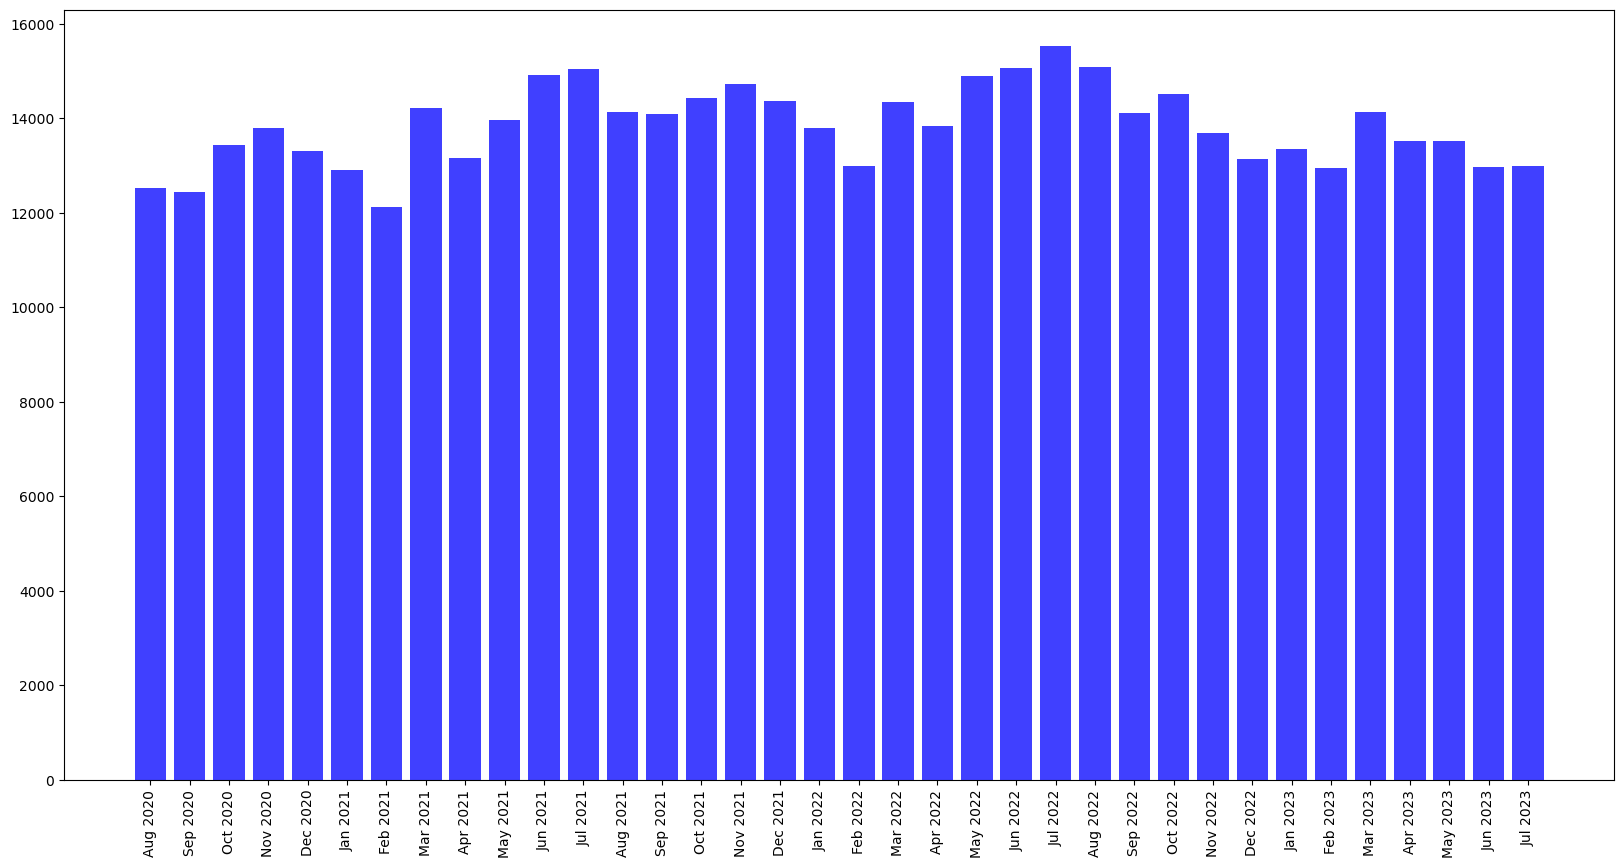

In [12]:
# Overall data from Police data
Monthly_crime_count = Bham_police_cleaned.groupby(["Month"])["LSOA code"].count()
print(Monthly_crime_count.head())

plt.figure(figsize=(20,10))
plt.bar(months_dict.values(), Monthly_crime_count, color='b', alpha=0.75, align="center")
plt.xticks(rotation="vertical")
plt.savefig("output/01.png")
plt.show()


Month    Crime type                  
2020-08  Violence and sexual offences    4742
         Anti-social behaviour           2257
         Public order                    1005
         Criminal damage and arson        911
         Vehicle crime                    893
                                         ... 
2023-07  Drugs                            301
         Possession of weapons            253
         Other crime                      189
         Theft from the person            157
         Bicycle theft                     76
Name: Crime type, Length: 504, dtype: int64


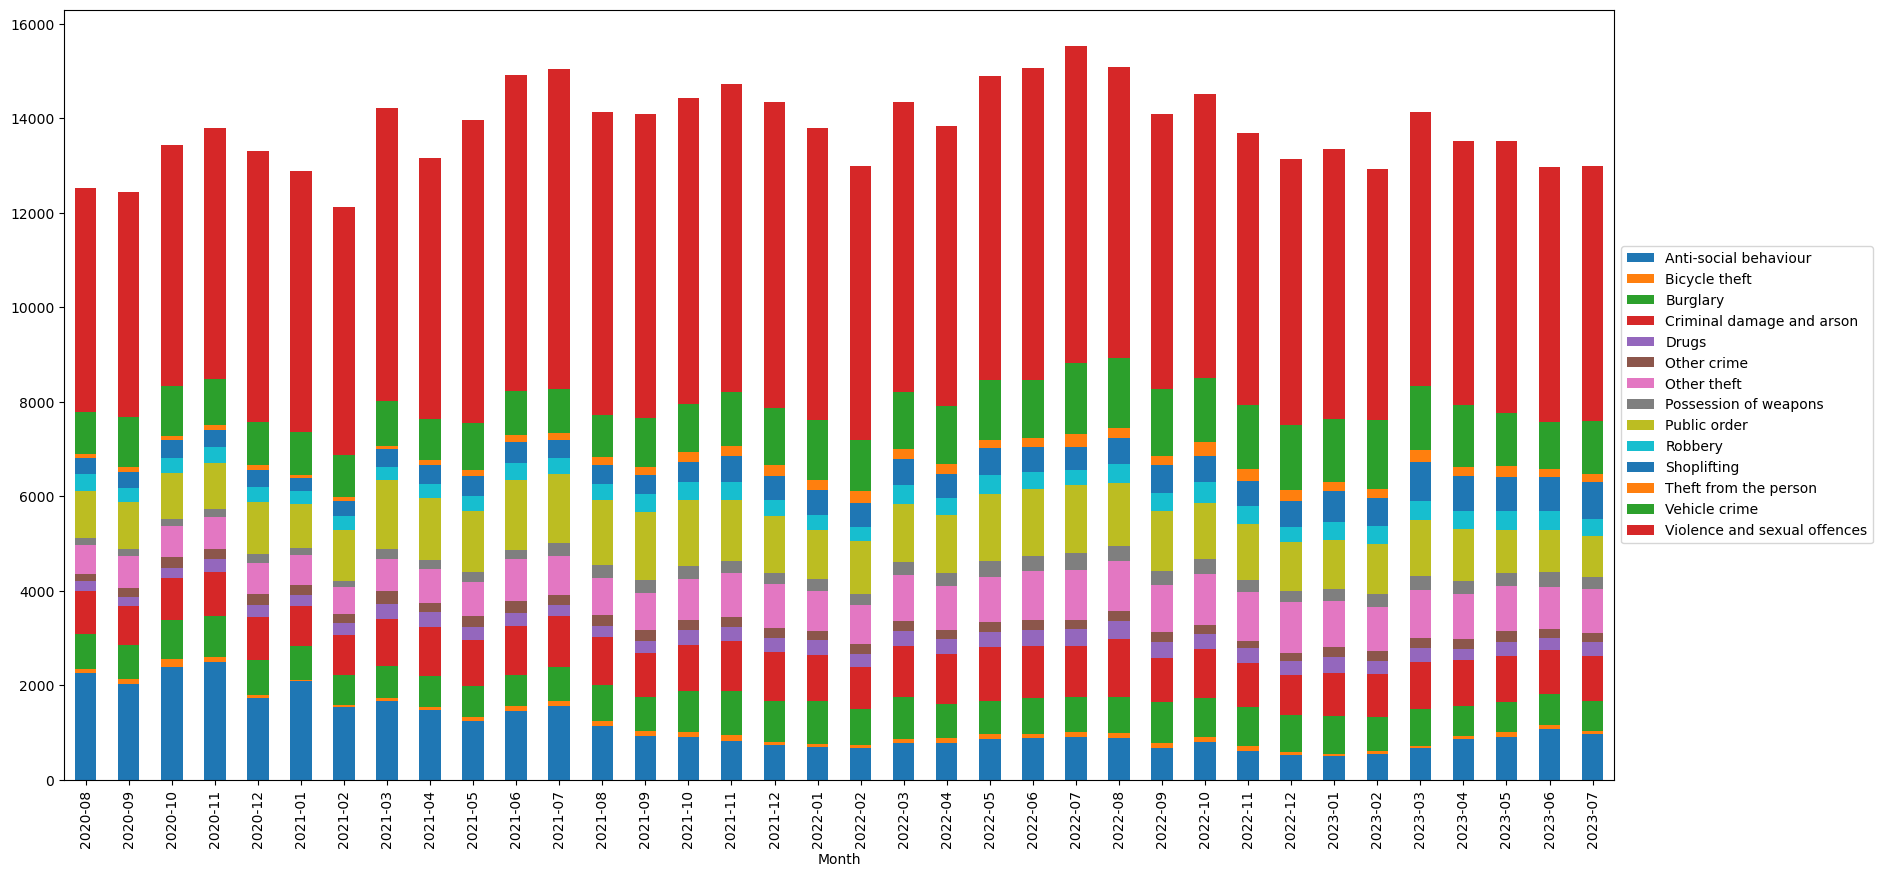

In [13]:
Crime_value_counts = Bham_police_cleaned.groupby(["Month"])["Crime type"].value_counts()
print(Crime_value_counts)


Crime_value_counts.unstack().plot.bar(stacked=True, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("output/02.png")
plt.show()


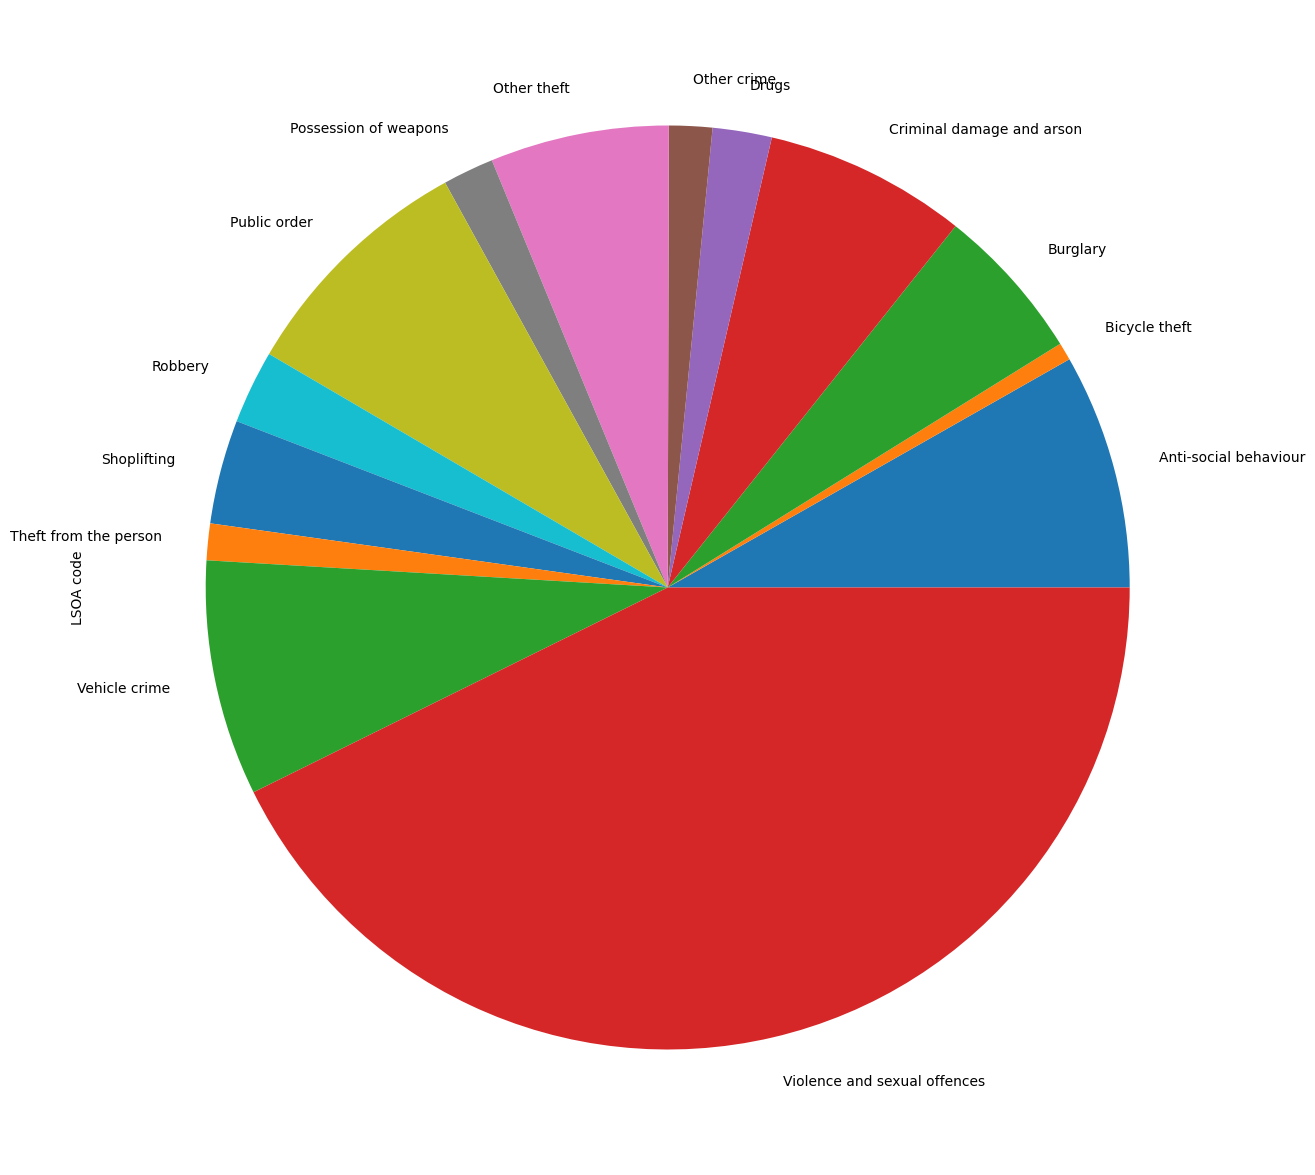

Index(['Anti-social behaviour', 'Bicycle theft', 'Burglary',
       'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft',
       'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
       'Theft from the person', 'Vehicle crime',
       'Violence and sexual offences'],
      dtype='object', name='Crime type')

In [14]:
Crime_type_count = Bham_police_cleaned.groupby(["Crime type"])["LSOA code"].count()
Crime_type_count.plot.pie(subplots=True,figsize=(15,15))

plt.savefig("output/03.png")
plt.show()
# Crime_type_count

Crime_type_count.index


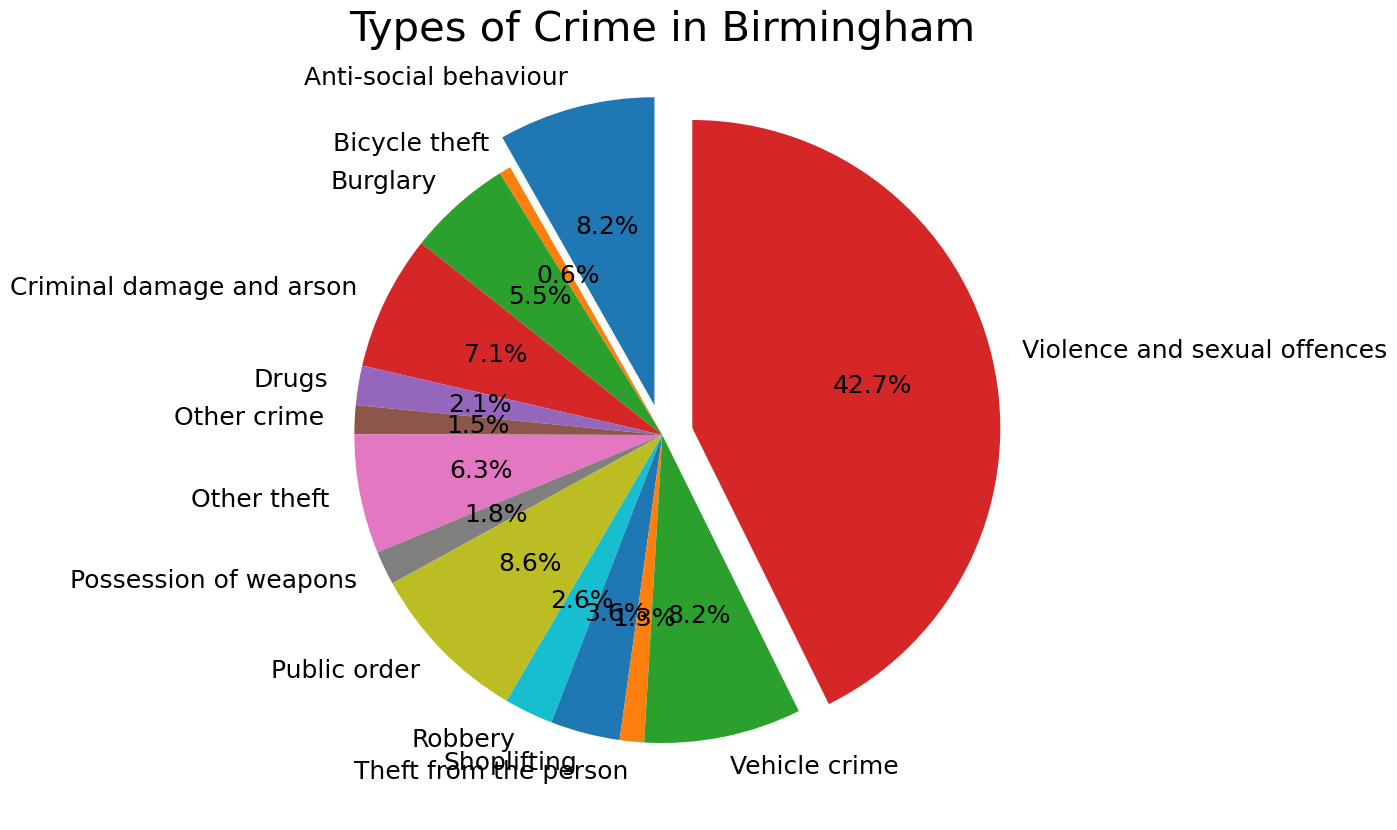

In [15]:
# Labels for the sections of our pie chart
labels = Crime_type_count.index

# The values of each section of the pie chart
sizes = Crime_type_count

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0.1)
plt.figure(figsize=(20,10))
plt.title("Types of Crime in Birmingham", fontsize=30)


plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", startangle=90,textprops={'fontsize': 18})


plt.savefig("output/04.png")
plt.show()

In [16]:
Bham_police_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498057 entries, 0 to 498056
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   LSOA code   498057 non-null  object 
 1   LSOA name   498057 non-null  object 
 2   Month       498057 non-null  object 
 3   Longitude   498057 non-null  float64
 4   Latitude    498057 non-null  float64
 5   Crime type  498057 non-null  object 
dtypes: float64(2), object(4)
memory usage: 26.6+ MB


In [17]:
IMD_Bham.describe()

,Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)
count,639.000000,639.000000,639.000000
mean,37.608263,7752.449139,2.890454
std,16.949958,7404.626407,2.250856
min,3.431000,45.000000,1.000000
25%,22.942500,1891.000000,1.000000
50%,38.311000,4791.000000,2.000000
75%,51.872500,12095.500000,4.000000
max,78.083000,31954.000000,10.000000


In [18]:
IMD_Bham.head()

,LSOA code,LSOA name,Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)
0,E01009417,Birmingham 001A,E08000025,Birmingham,12.652,21433,7
1,E01009418,Birmingham 001B,E08000025,Birmingham,19.086,15161,5
2,E01009419,Birmingham 001C,E08000025,Birmingham,17.512,16545,6
3,E01009433,Birmingham 001D,E08000025,Birmingham,5.935,29541,9
4,E01009415,Birmingham 002A,E08000025,Birmingham,6.040,29422,9


In [94]:
LSOA_UK_lat_lon = pd.read_csv("Resources/Census_Data/lsoa_latlong.csv")

LSOA_UK_lat_lon = LSOA_UK_lat_lon.rename(columns={"lsoa11cd":"LSOA code"})


LSOA__Bham_lat_lon = pd.merge(LSOA_Bham,LSOA_UK_lat_lon,on="LSOA code")
print(LSOA__Bham_lat_lon)

LSOA = "E01033557"

''' 
E01033557 52.475543  -1.908713
E01033617 52.484558  -1.892899
E01033561 52.485012  -1.884991
E01033615 52.475054  -1.895817
E01033620 52.480647  -1.899039
'''


# specific_LSOA = LSOA__Bham_lat_lon.loc[LSOA__Bham_lat_lon["LSOA code"] == LSOA]
# print(specific_LSOA)

# map_plot = specific_LSOA.hvplot.points(
#     "longitude",
#     "latitude",
#     geo=True,
#     tiles = "OSM"
# )

map_plot = LSOA__Bham_lat_lon.hvplot.points(
    "longitude",
    "latitude",
    geo=True,
    tiles = "EsriNatGeo",
    frame_width = 800,
    frame_height = 600,
    color = "LSOA name",
    size = 75
)


map_plot

           LSOA name  LSOA code     LSOACD   latitude  longitude
0    Birmingham 067A  E01008881  E01008881  52.467331  -1.814266
1    Birmingham 066A  E01008882  E01008882  52.466360  -1.828883
2    Birmingham 078A  E01008883  E01008883  52.463228  -1.822689
3    Birmingham 078B  E01008884  E01008884  52.461092  -1.835955
4    Birmingham 076A  E01008885  E01008885  52.460640  -1.807253
..               ...        ...        ...        ...        ...
634  Birmingham 031I  E01033646  E01033646  52.518458  -1.850591
635  Birmingham 058E  E01033647  E01033647  52.479923  -1.847693
636  Birmingham 084F  E01033648  E01033648  52.451622  -1.880321
637  Birmingham 058F  E01033649  E01033649  52.482072  -1.846187
638  Birmingham 077F  E01033650  E01033650  52.462104  -1.864970

[639 rows x 5 columns]


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (LSOA name)

In [92]:
'''
Months List: print(Bham_police_cleaned["Month"].unique()) 
['2020-08' '2020-09' '2020-12' '2021-01' '2021-03' '2021-06' '2021-07'
 '2021-08' '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02'
 '2022-03' '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09'
 '2022-10' '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04'
 '2023-05' '2023-06' '2023-07' '2020-10' '2020-11' '2021-02' '2021-04'
 '2021-05']
 '''

'''
Crime type list: print(Bham_police_cleaned["Crime type"].unique())
['Anti-social behaviour' 'Vehicle crime' 'Burglary'
 'Criminal damage and arson' 'Violence and sexual offences'
 'Possession of weapons' 'Public order' 'Robbery' 'Other theft'
 'Other crime' 'Bicycle theft' 'Drugs' 'Theft from the person'
 'Shoplifting']
 '''

select_month = '2020-08'
select_crime = 'Anti-social behaviour'

test = Bham_police_cleaned.loc[(Bham_police_cleaned["Crime type"] == select_crime) & (Bham_police_cleaned["Month"] == select_month)]


map_plot = test.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles = "OSM",
    frame_width = 1200,
    frame_height = 900,
    color = "LSOA code"
)

# Display the map

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (LSOA code)

In [38]:
# Read in rural and urban classification

rural_urban_df = pd.read_csv("Resources/Census_Data/rural_urban_classification.csv")


LSOA_Bham

rural_urban_df = rural_urban_df.rename(columns={"LSOA11CD":"LSOA code"})
rural_urban_df.head()

rural_urban_bham = pd.merge(rural_urban_df,LSOA_Bham,on="LSOA code")
rural_urban_bham = rural_urban_bham.iloc[:,[1,3,4,5]]
rural_urban_bham


,LSOA code,RUC11CD,RUC11,LSOA name
0,E01008941,A1,Urban major conurbation,Birmingham 115C
1,E01008883,A1,Urban major conurbation,Birmingham 078A
2,E01008994,A1,Urban major conurbation,Birmingham 074B
3,E01008942,A1,Urban major conurbation,Birmingham 117A
4,E01008995,A1,Urban major conurbation,Birmingham 134A
...,...,...,...,...
634,E01033561,A1,Urban major conurbation,Birmingham 050E
635,E01033562,A1,Urban major conurbation,Birmingham 087F
636,E01033564,A1,Urban major conurbation,Birmingham 136C
637,E01033565,A1,Urban major conurbation,Birmingham 137B


In [231]:
# Merge IMD with Police Data

Police_IMD_Merge = pd.merge(IMD_Bham,Bham_police_cleaned,on="LSOA code")

LSOA_count = Police_IMD_Merge.groupby("LSOA code")["Index of Multiple Deprivation (IMD) Score"].count()


print(LSOA_count)
Police_IMD_Merge.head()


# Police_IMD_Merge = pd.merge(Police_IMD_Merge,LSOA_count,on="LSOA code",how="outer")
# Police_IMD_Merge = Police_IMD_Merge.rename(columns={"Index of Multiple Deprivation (IMD) Score_y":"Crime Count"})

# Police_IMD_Merge["Crime Rate"] = 100 * (Police_IMD_Merge["Crime Count"] / Police_IMD_Merge["Total population: mid 2015 (excluding prisoners)"])
# Police_IMD_Merge


LSOA code
E01008881    1145
E01008882     722
E01008883     936
E01008884    1118
E01008885     371
             ... 
E01033646    1458
E01033647     487
E01033648     965
E01033649     366
E01033650     750
Name: Index of Multiple Deprivation (IMD) Score, Length: 639, dtype: int64


,LSOA code,LSOA name_x,Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Total population: mid 2015 (excluding prisoners),LSOA name_y,Month,Longitude,Latitude,Crime type
0,E01009417,Birmingham 001A,E08000025,Birmingham,12.652,21433,7,0.088,1529,Birmingham 001A,2020-08,-1.850056,52.591108,Anti-social behaviour
1,E01009417,Birmingham 001A,E08000025,Birmingham,12.652,21433,7,0.088,1529,Birmingham 001A,2020-08,-1.851038,52.593177,Vehicle crime
2,E01009417,Birmingham 001A,E08000025,Birmingham,12.652,21433,7,0.088,1529,Birmingham 001A,2020-09,-1.850772,52.588691,Anti-social behaviour
3,E01009417,Birmingham 001A,E08000025,Birmingham,12.652,21433,7,0.088,1529,Birmingham 001A,2020-12,-1.850056,52.591108,Burglary
4,E01009417,Birmingham 001A,E08000025,Birmingham,12.652,21433,7,0.088,1529,Birmingham 001A,2020-12,-1.845290,52.590509,Criminal damage and arson


In [169]:
# Groupby LSOA

f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first',\
     "Longitude": "first", "Latitude": "first"}
LSOA_crime_count_df = Police_IMD_Merge.groupby(["LSOA code"]).agg(f)


LSOA_crime_count_df


,LSOA name_x,LSOA code,Index of Multiple Deprivation (IMD) Score,Longitude,Latitude
LSOA code,,,,,
E01008881,Birmingham 067A,1145,41.179,-1.809133,52.466198
E01008882,Birmingham 066A,722,59.693,-1.827175,52.467071
E01008883,Birmingham 078A,936,38.636,-1.823928,52.461987
E01008884,Birmingham 078B,1118,44.315,-1.826609,52.464966
E01008885,Birmingham 076A,371,22.921,-1.807720,52.462690
...,...,...,...,...,...
E01033646,Birmingham 031I,1458,64.138,-1.851777,52.513888
E01033647,Birmingham 058E,487,53.340,-1.850267,52.481117
E01033648,Birmingham 084F,965,55.778,-1.879837,52.452779


The Pearson Coerrelation Coefficient, r = 0.0865602257786056
The Coefficient of Determination r-saqured = 0.0074926726868431775


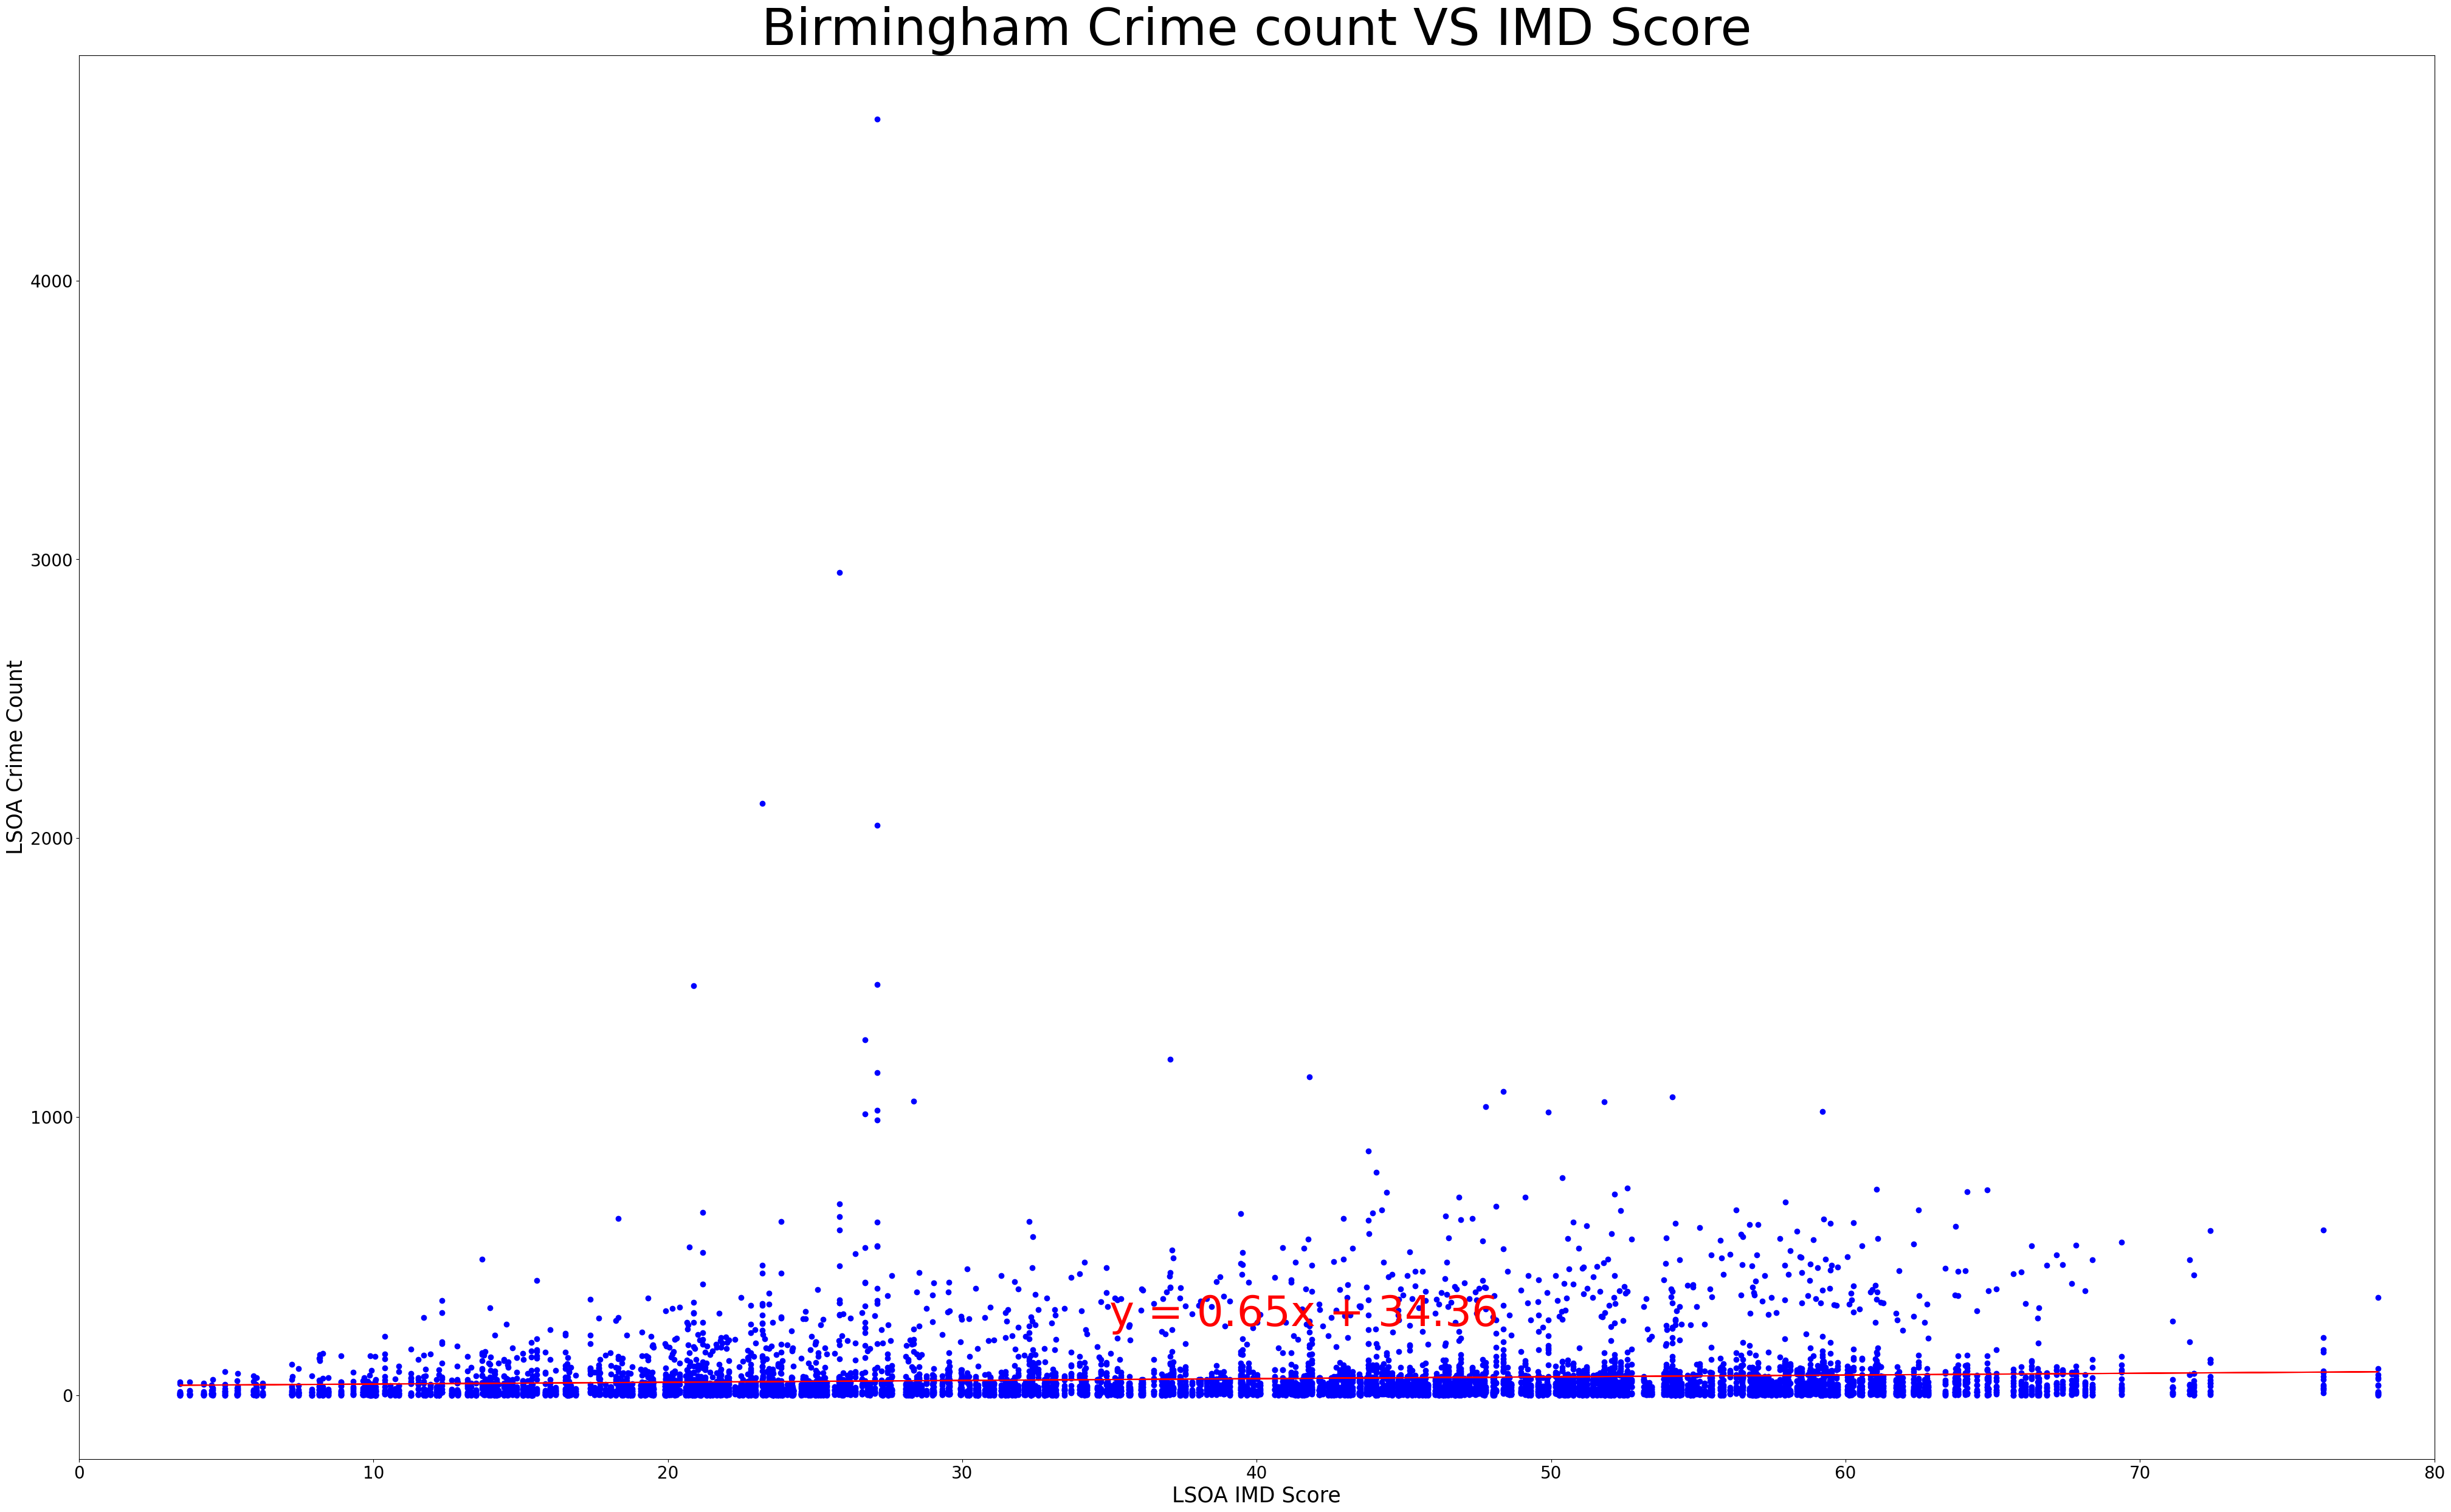

In [245]:

y_axis = LSOA_crime_count_df["LSOA code"]
x_axis = LSOA_crime_count_df["Index of Multiple Deprivation (IMD) Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f'The Pearson Coerrelation Coefficient, r = {rvalue}\nThe Coefficient of Determination r-saqured = {rvalue**2}')


plt.title("Birmingham Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
# plt.ylim(0, 1800)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("LSOA IMD Score", fontsize=25)
plt.ylabel("LSOA Crime Count", fontsize=25)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/05.png")
plt.show()



In [ ]:
y_axis = LSOA_crime_count_df["LSOA code"]
x_axis = LSOA_crime_count_df["Index of Multiple Deprivation (IMD) Score"]
# Create a function to create Linear Regression plots


plt.title("Birmingham Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 1800)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("LSOA IMD Score", fontsize=25)
plt.ylabel("LSOA Crime Count", fontsize=25)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/05.png")
plt.show()


In [118]:
LSOA_crime_count_df = LSOA_crime_count_df.rename(columns={"LSOA code":"Crime count"})
LSOA_crime_count_df

LSOA_crime_count_df = LSOA_crime_count_df.sort_values("Crime count",ascending=False)
LSOA_crime_count_df.head(20)

LSOA_max_counts = LSOA_crime_count_df.iloc[0:10,:]
LSOA_max_counts

,LSOA name_x,Crime count,Index of Multiple Deprivation (IMD) Score,Longitude,Latitude
LSOA code,,,,,
E01033620,Birmingham 138A,14301,27.122,-1.894661,52.481417
E01033615,Birmingham 135C,7337,25.827,-1.892331,52.476614
E01033561,Birmingham 050E,5375,26.700,-1.885831,52.479395
E01033617,Birmingham 050F,5023,23.217,-1.892825,52.485614
E01033557,Birmingham 134B,3248,20.868,-1.906265,52.473857
E01009239,Birmingham 033F,3120,37.061,-1.895665,52.517503
E01009284,Birmingham 096A,2819,21.191,-1.934776,52.437781
E01009200,Birmingham 139A,2794,54.122,-1.886220,52.477058
E01009146,Birmingham 136B,2777,41.792,-1.912109,52.473996


In [133]:
map_plot = LSOA_max_counts.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles = "EsriStreet",
    frame_width = 1000,
    frame_height = 1000,
    color = "LSOA name_x",
    size = "Crime count",
    scale = 0.3,
    hover_cols = ["Crime count","Index of Multiple Deprivation (IMD) Score"]
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (LSOA name_x,Crime count,Index of Multiple Deprivation (IMD) Score)

In [174]:
# Groupby Crime Type


f = {"Crime type":"count", "Index of Multiple Deprivation (IMD) Score":'count'}
crime_type_groupby = Police_IMD_Merge.groupby(["Crime type"]).agg(f)


crime_type_groupby



,Crime type,Index of Multiple Deprivation (IMD) Score
Crime type,,
Anti-social behaviour,40962,40962
Bicycle theft,3084,3084
Burglary,27151,27151
Criminal damage and arson,35288,35288
Drugs,10309,10309
Other crime,7523,7523
Other theft,31153,31153
Possession of weapons,8902,8902
Public order,42659,42659


The r-value is: 0.05542908482078274


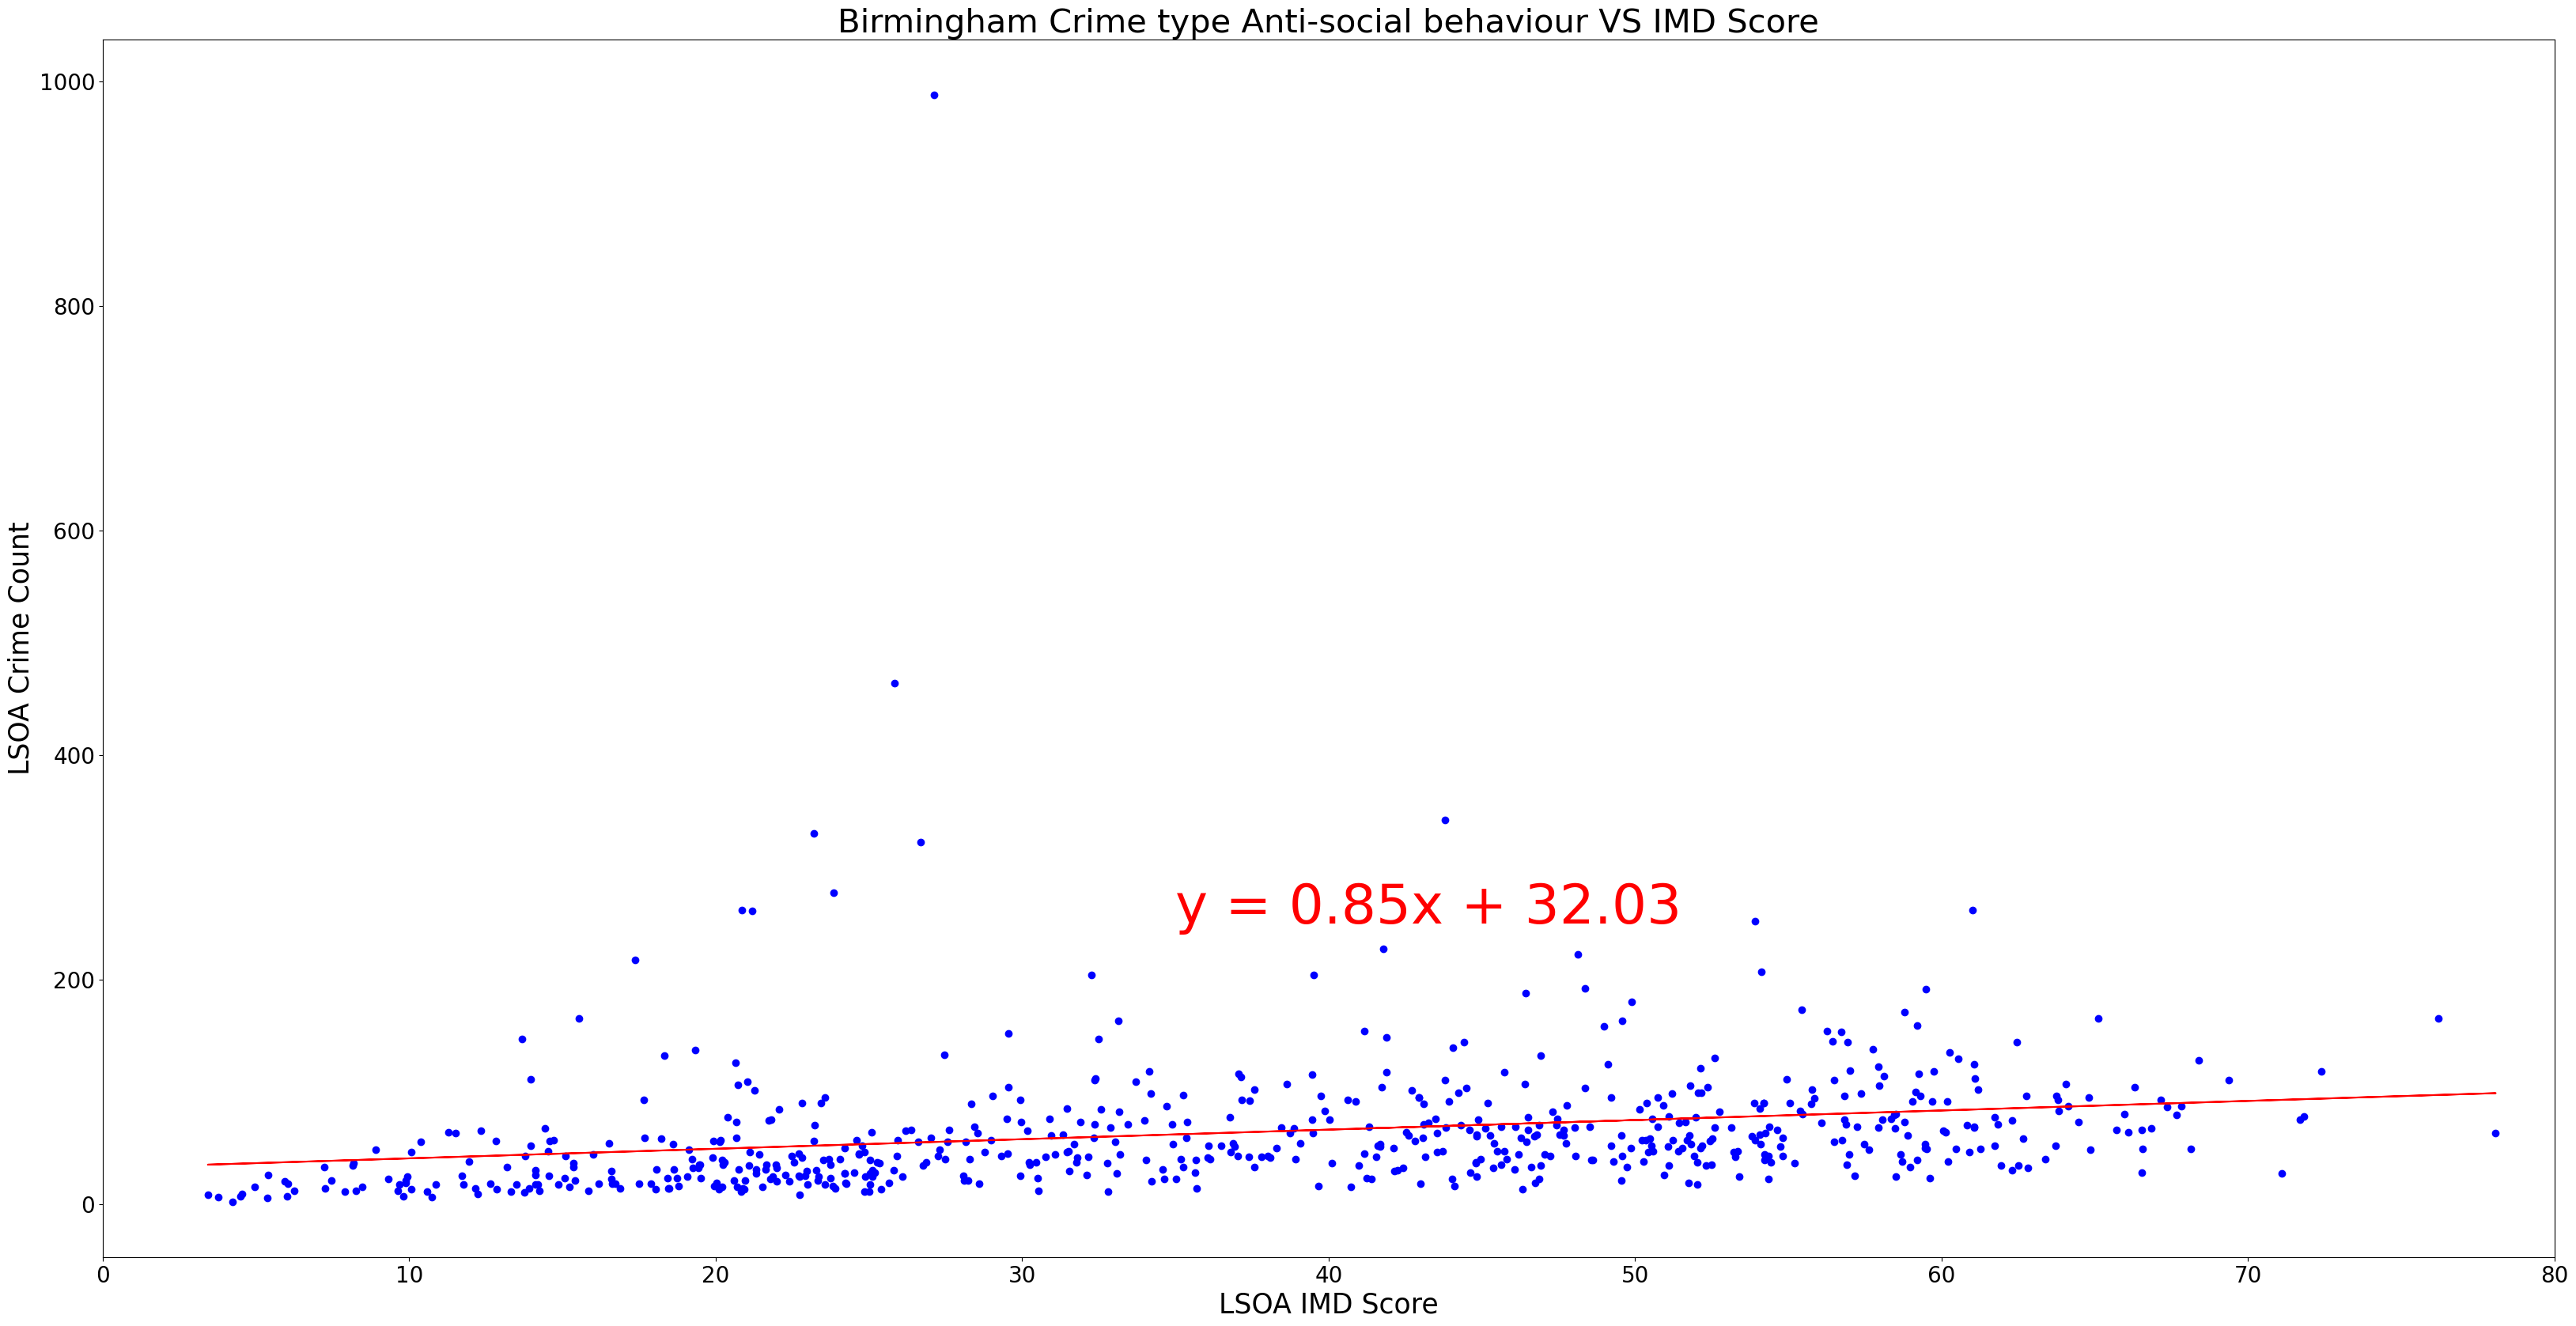

The r-value is: 0.0014504097587252193


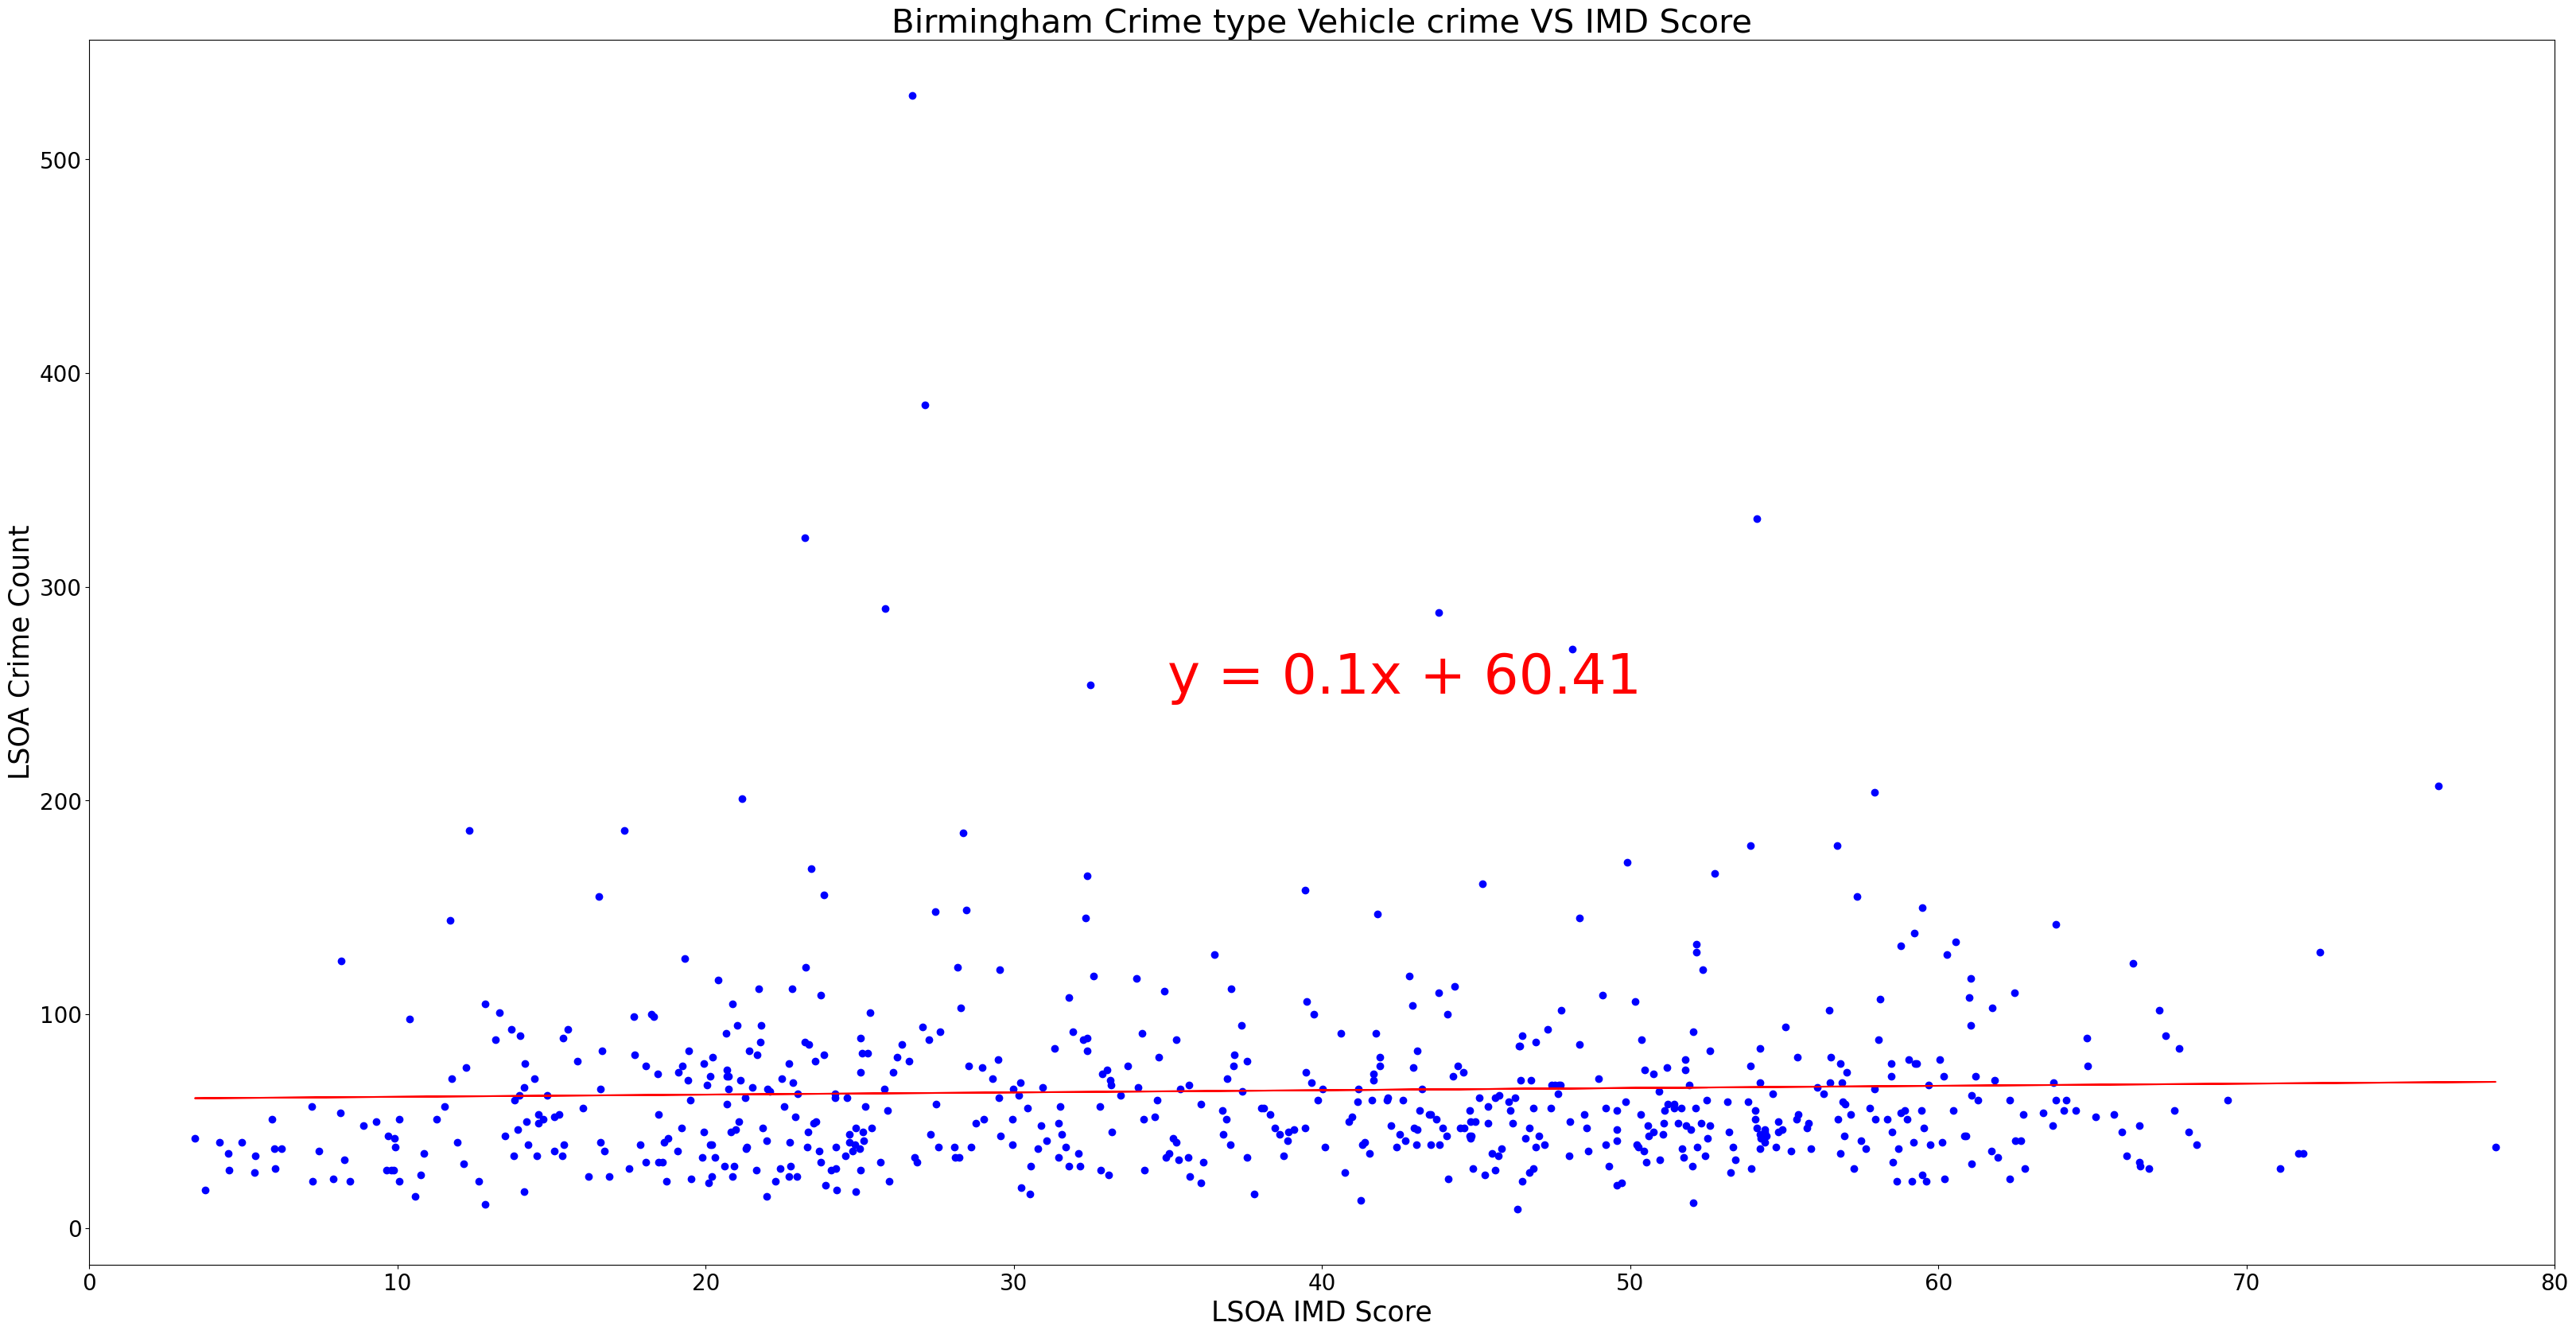

The r-value is: 0.010565519668420066


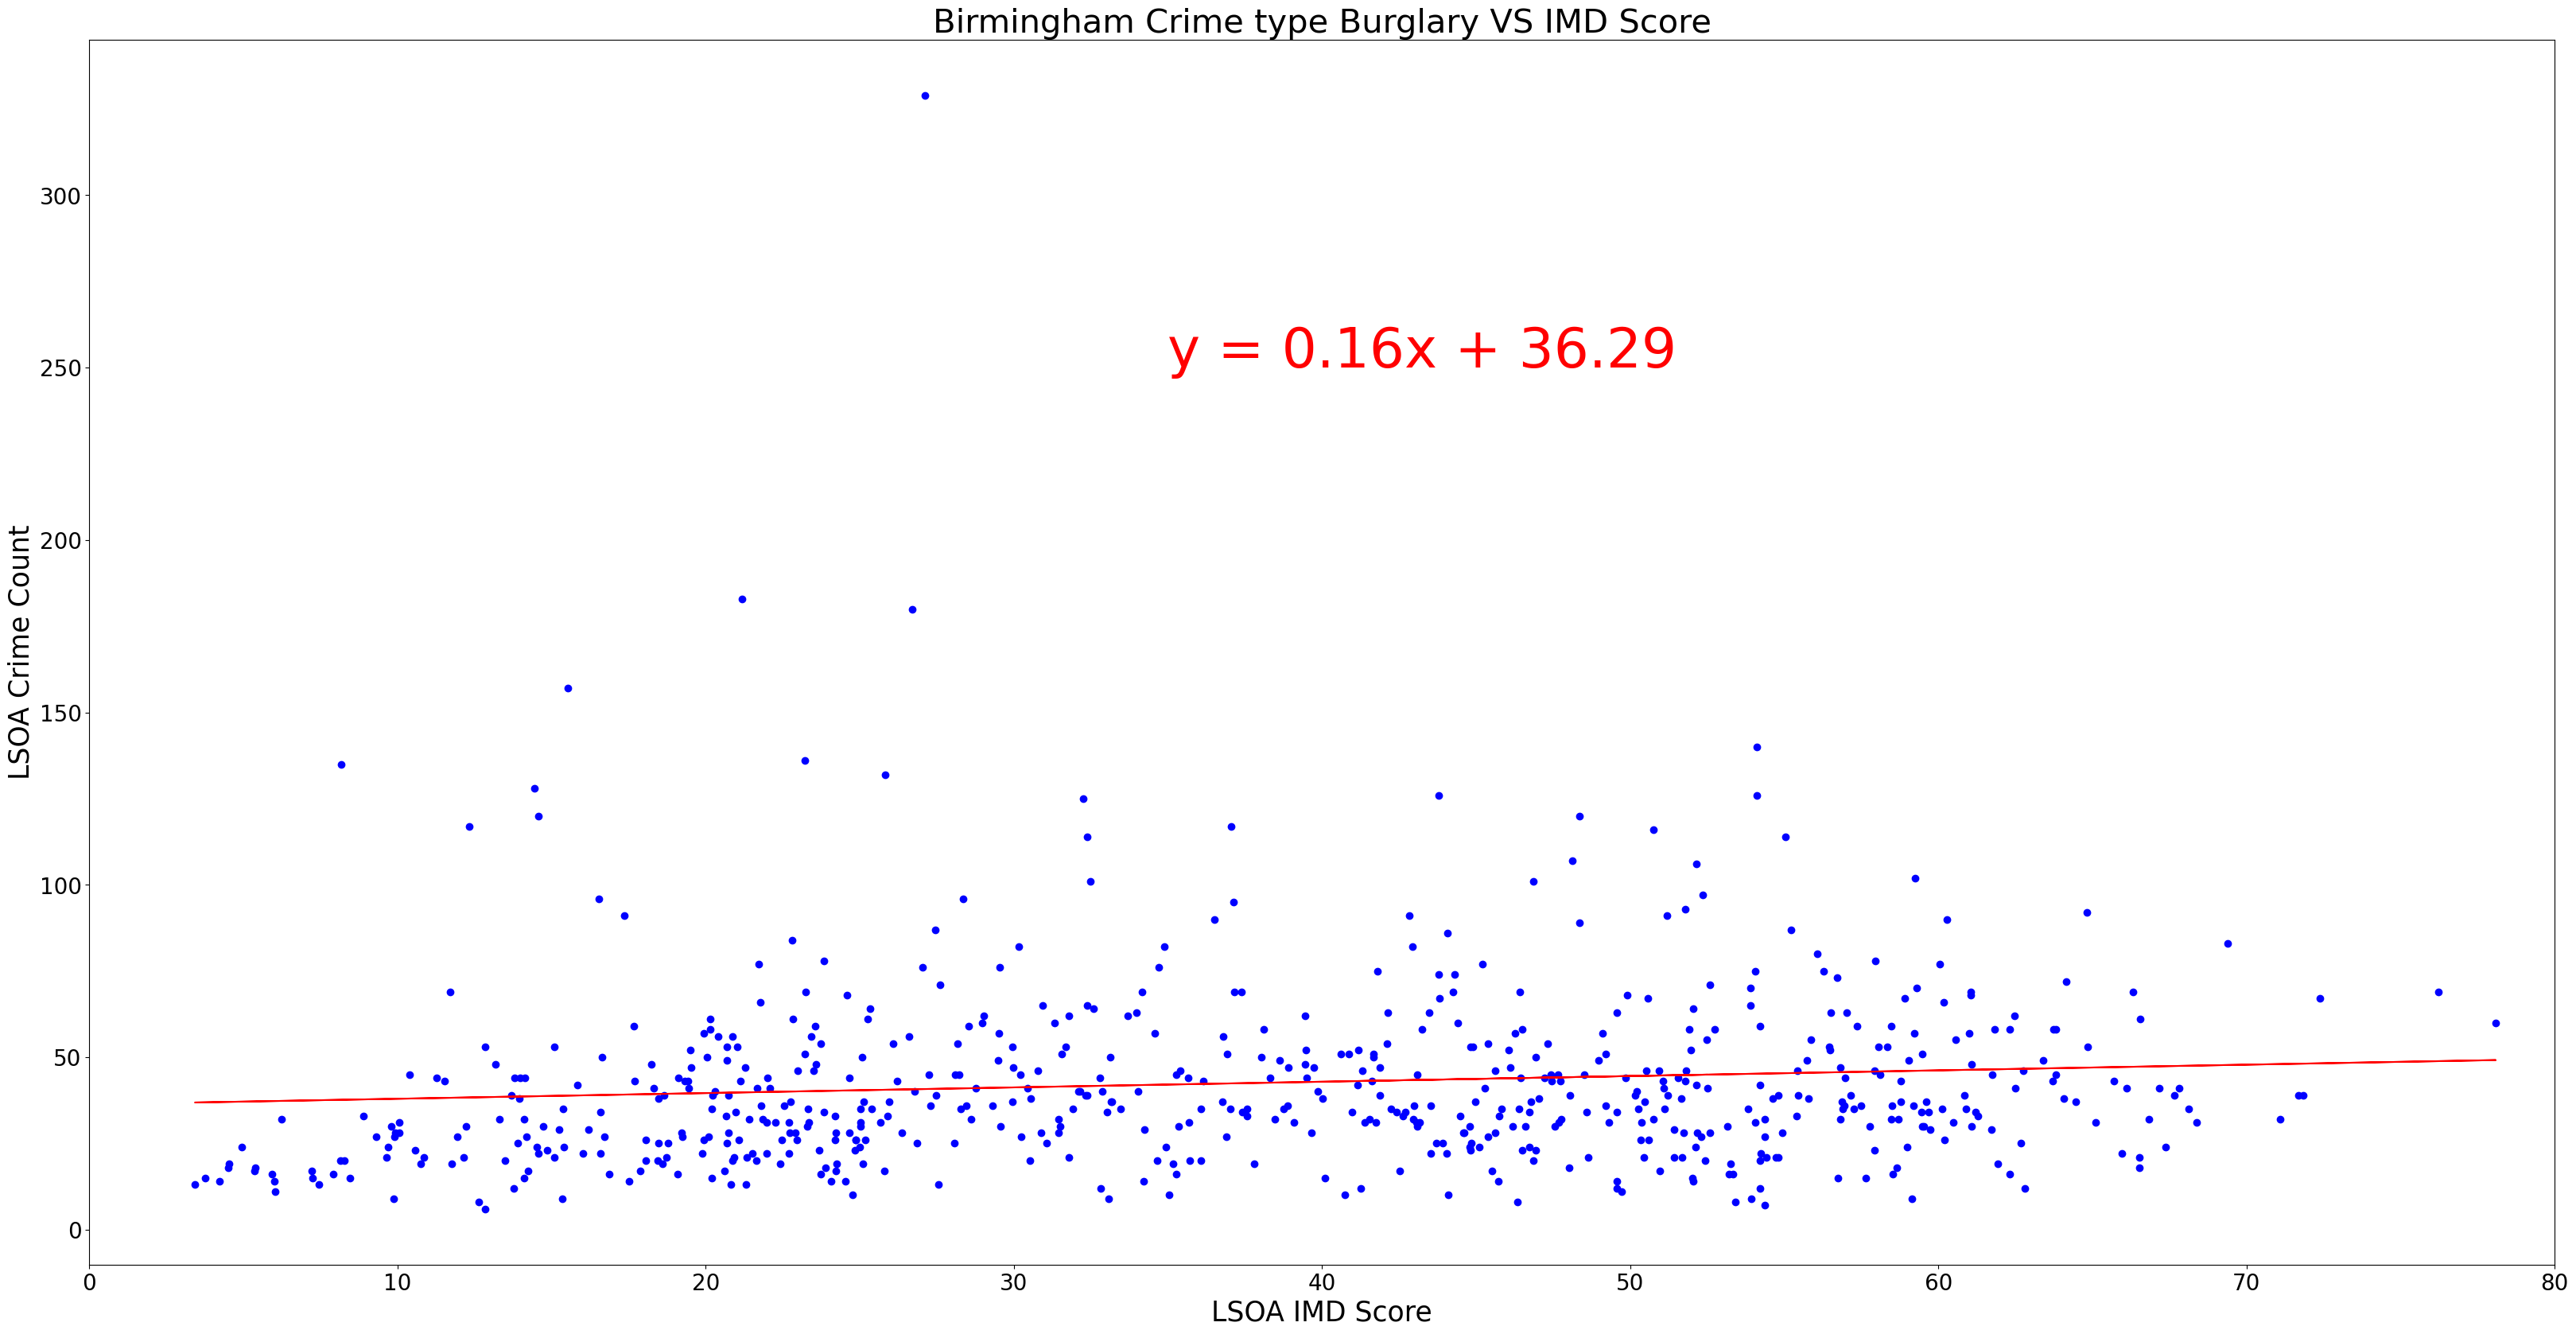

The r-value is: 0.16161643235252052


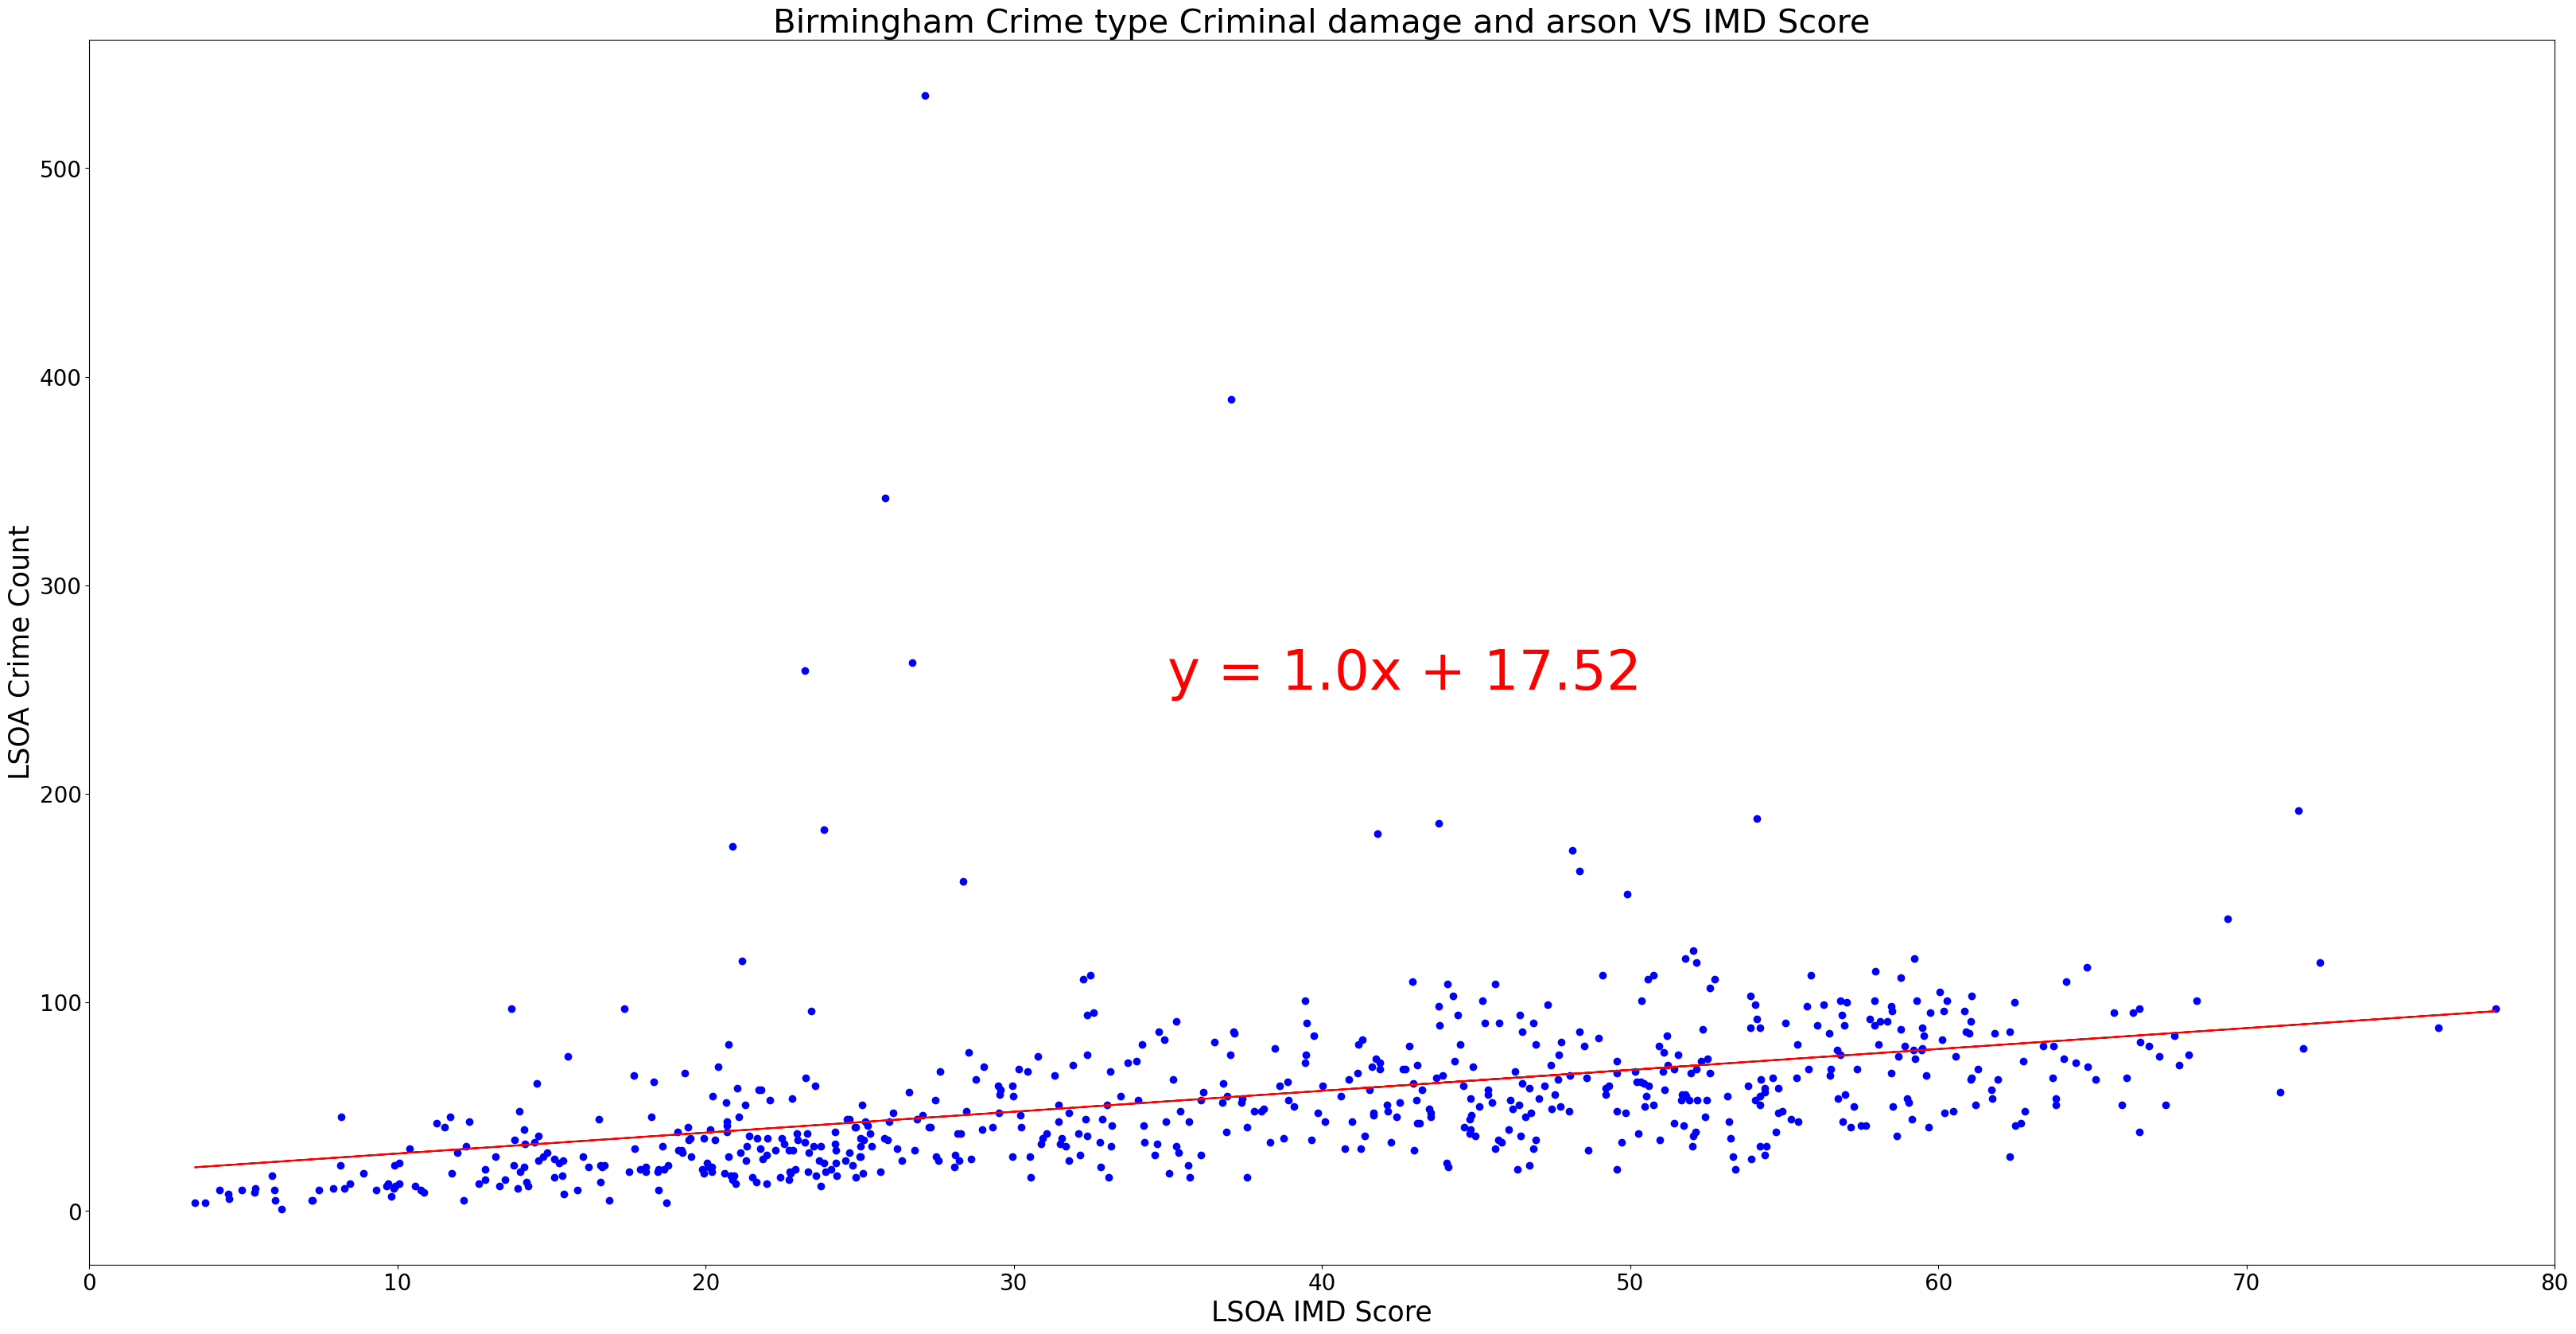

The r-value is: 0.12331690566353141


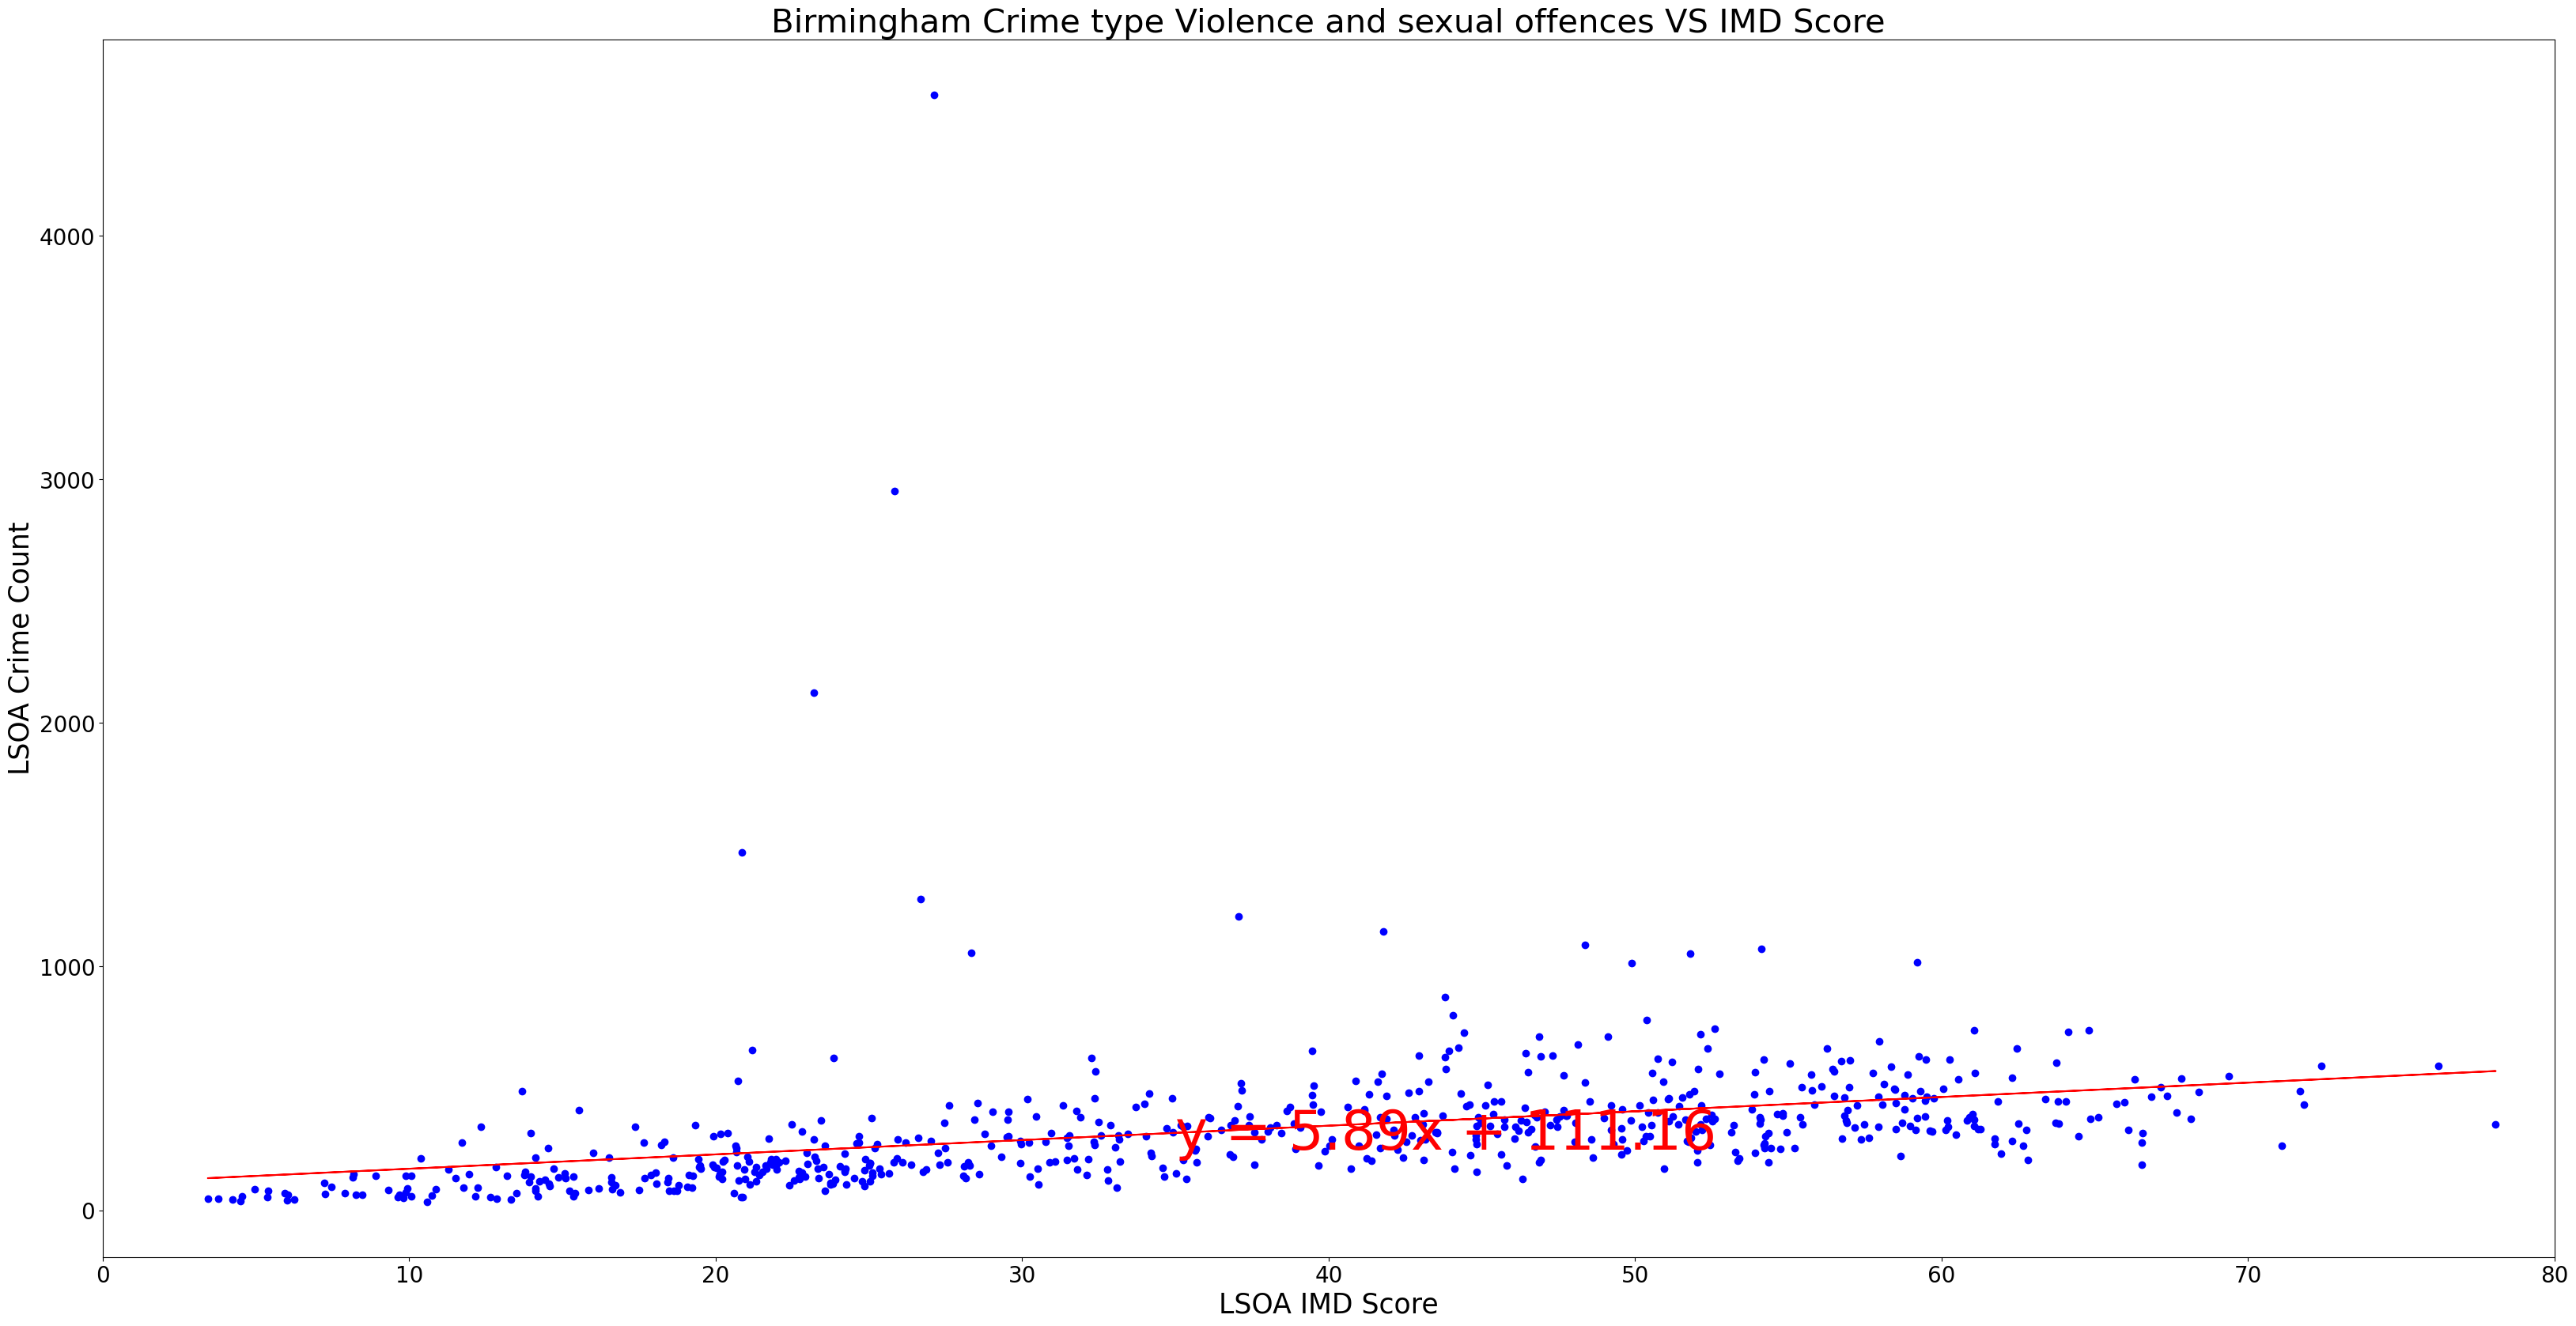

The r-value is: 0.0489138195434724


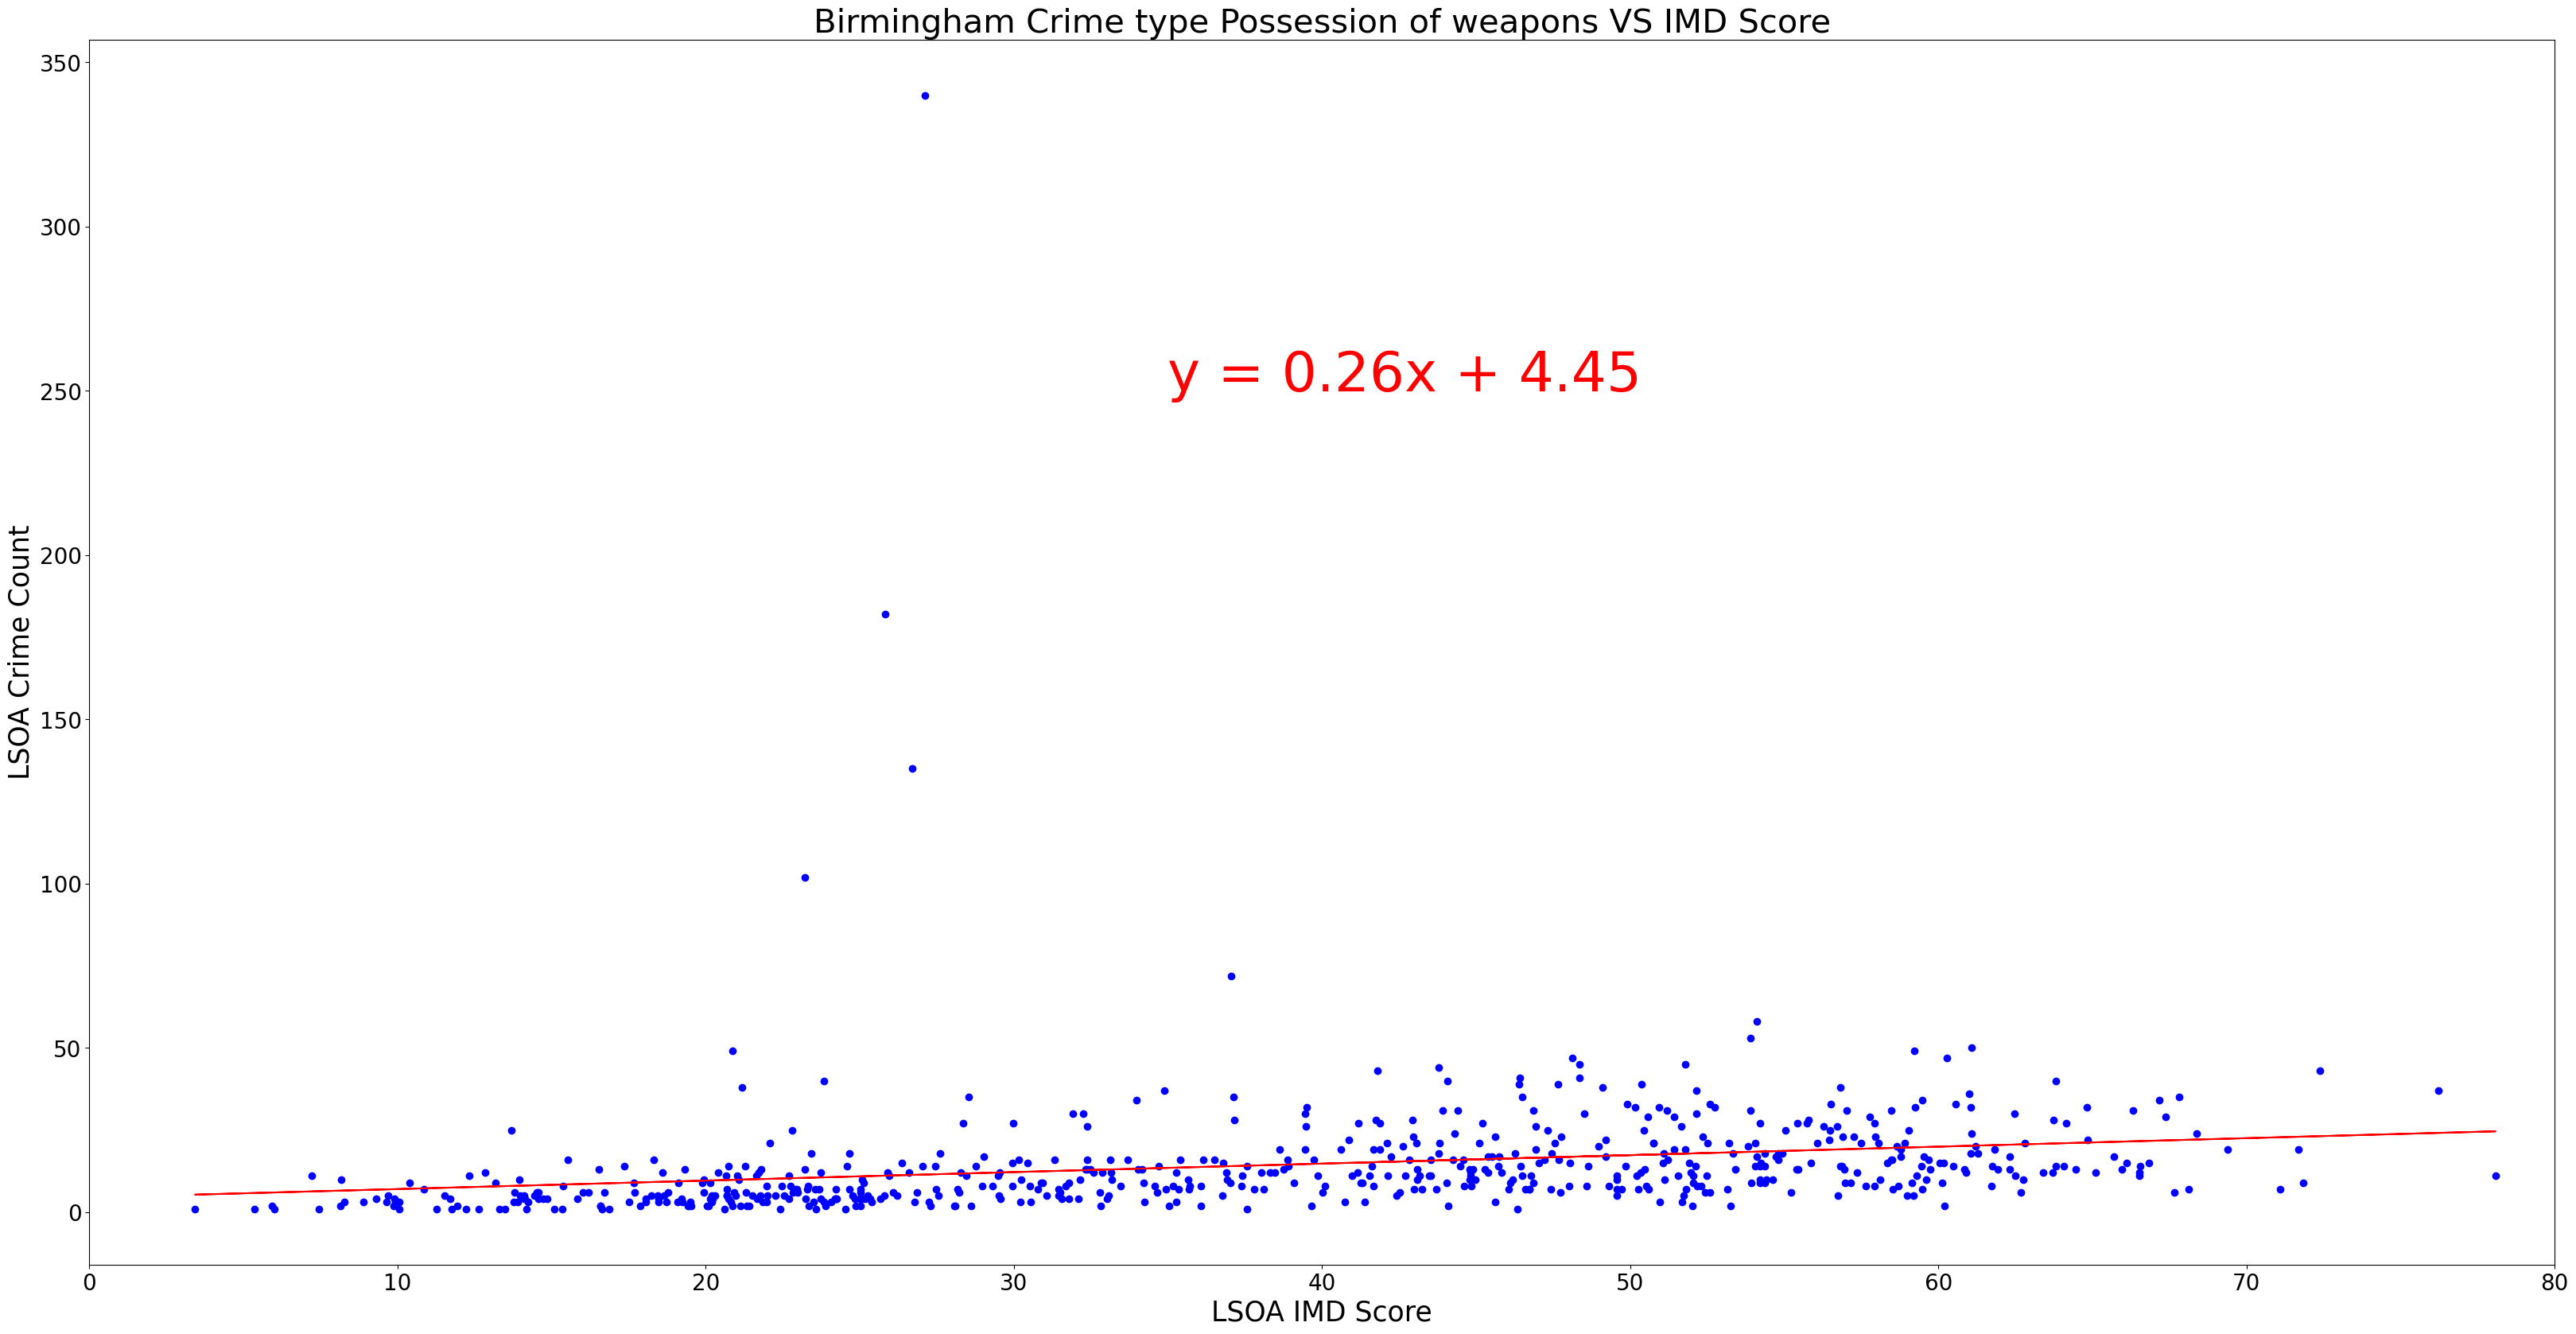

The r-value is: 0.03605226266886761


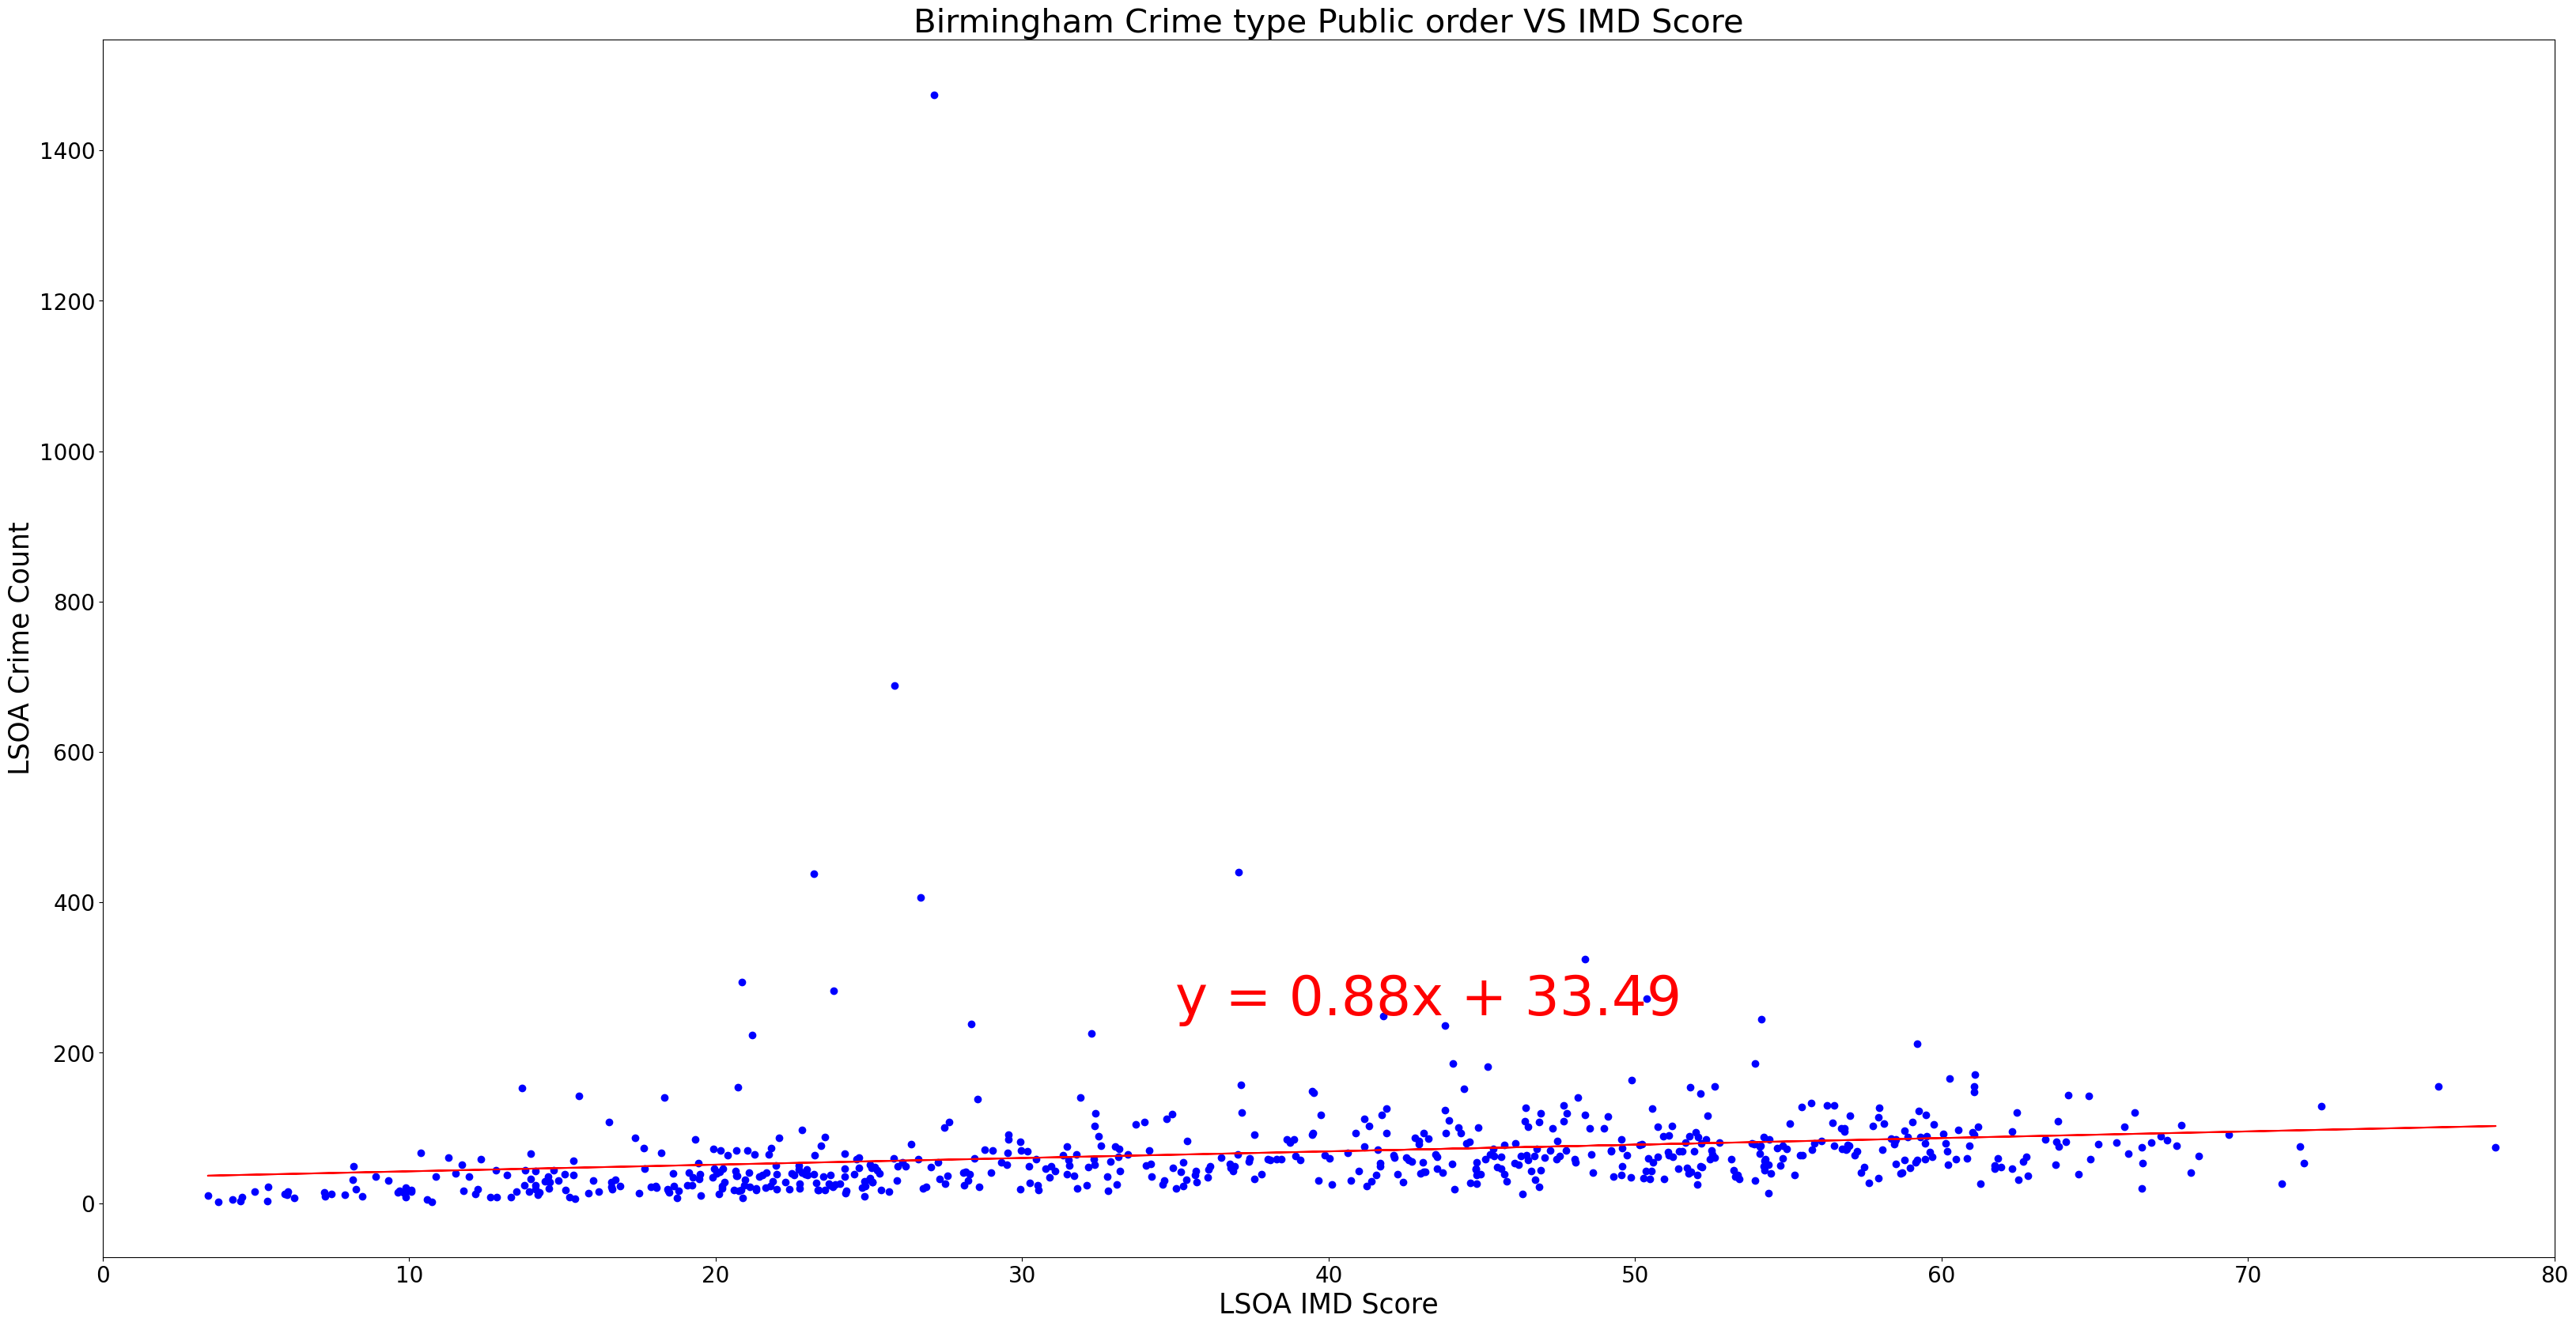

The r-value is: 0.012913910144187803


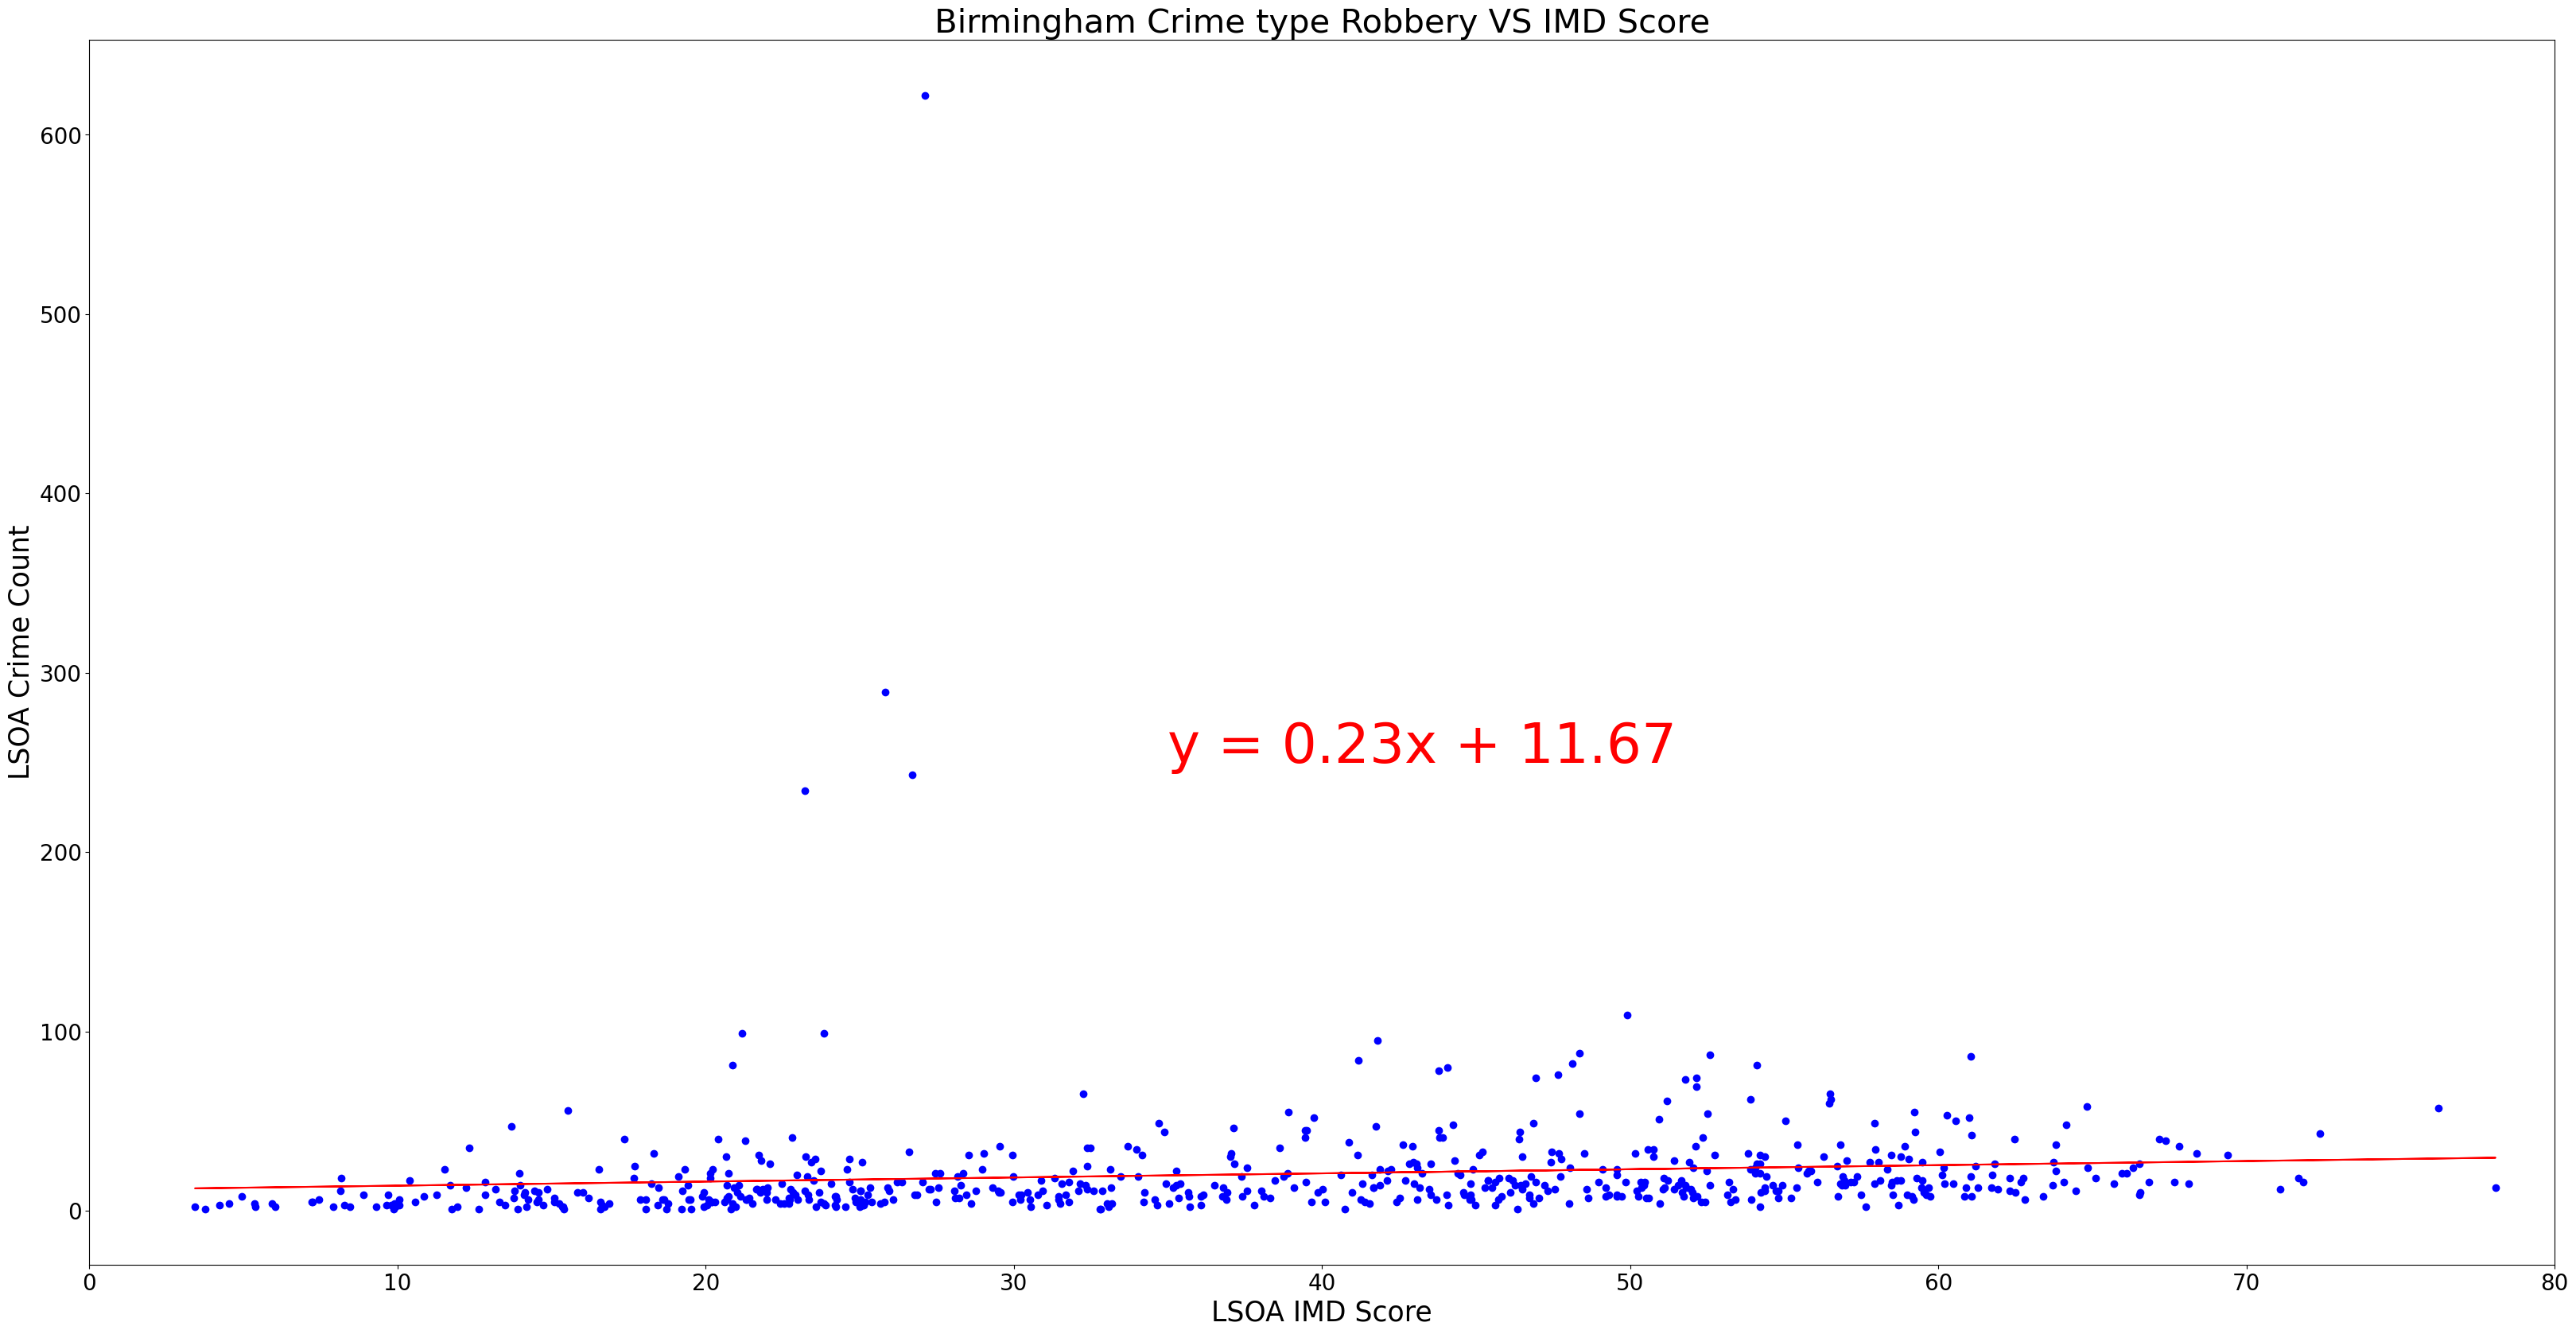

The r-value is: 0.0021916550941032016


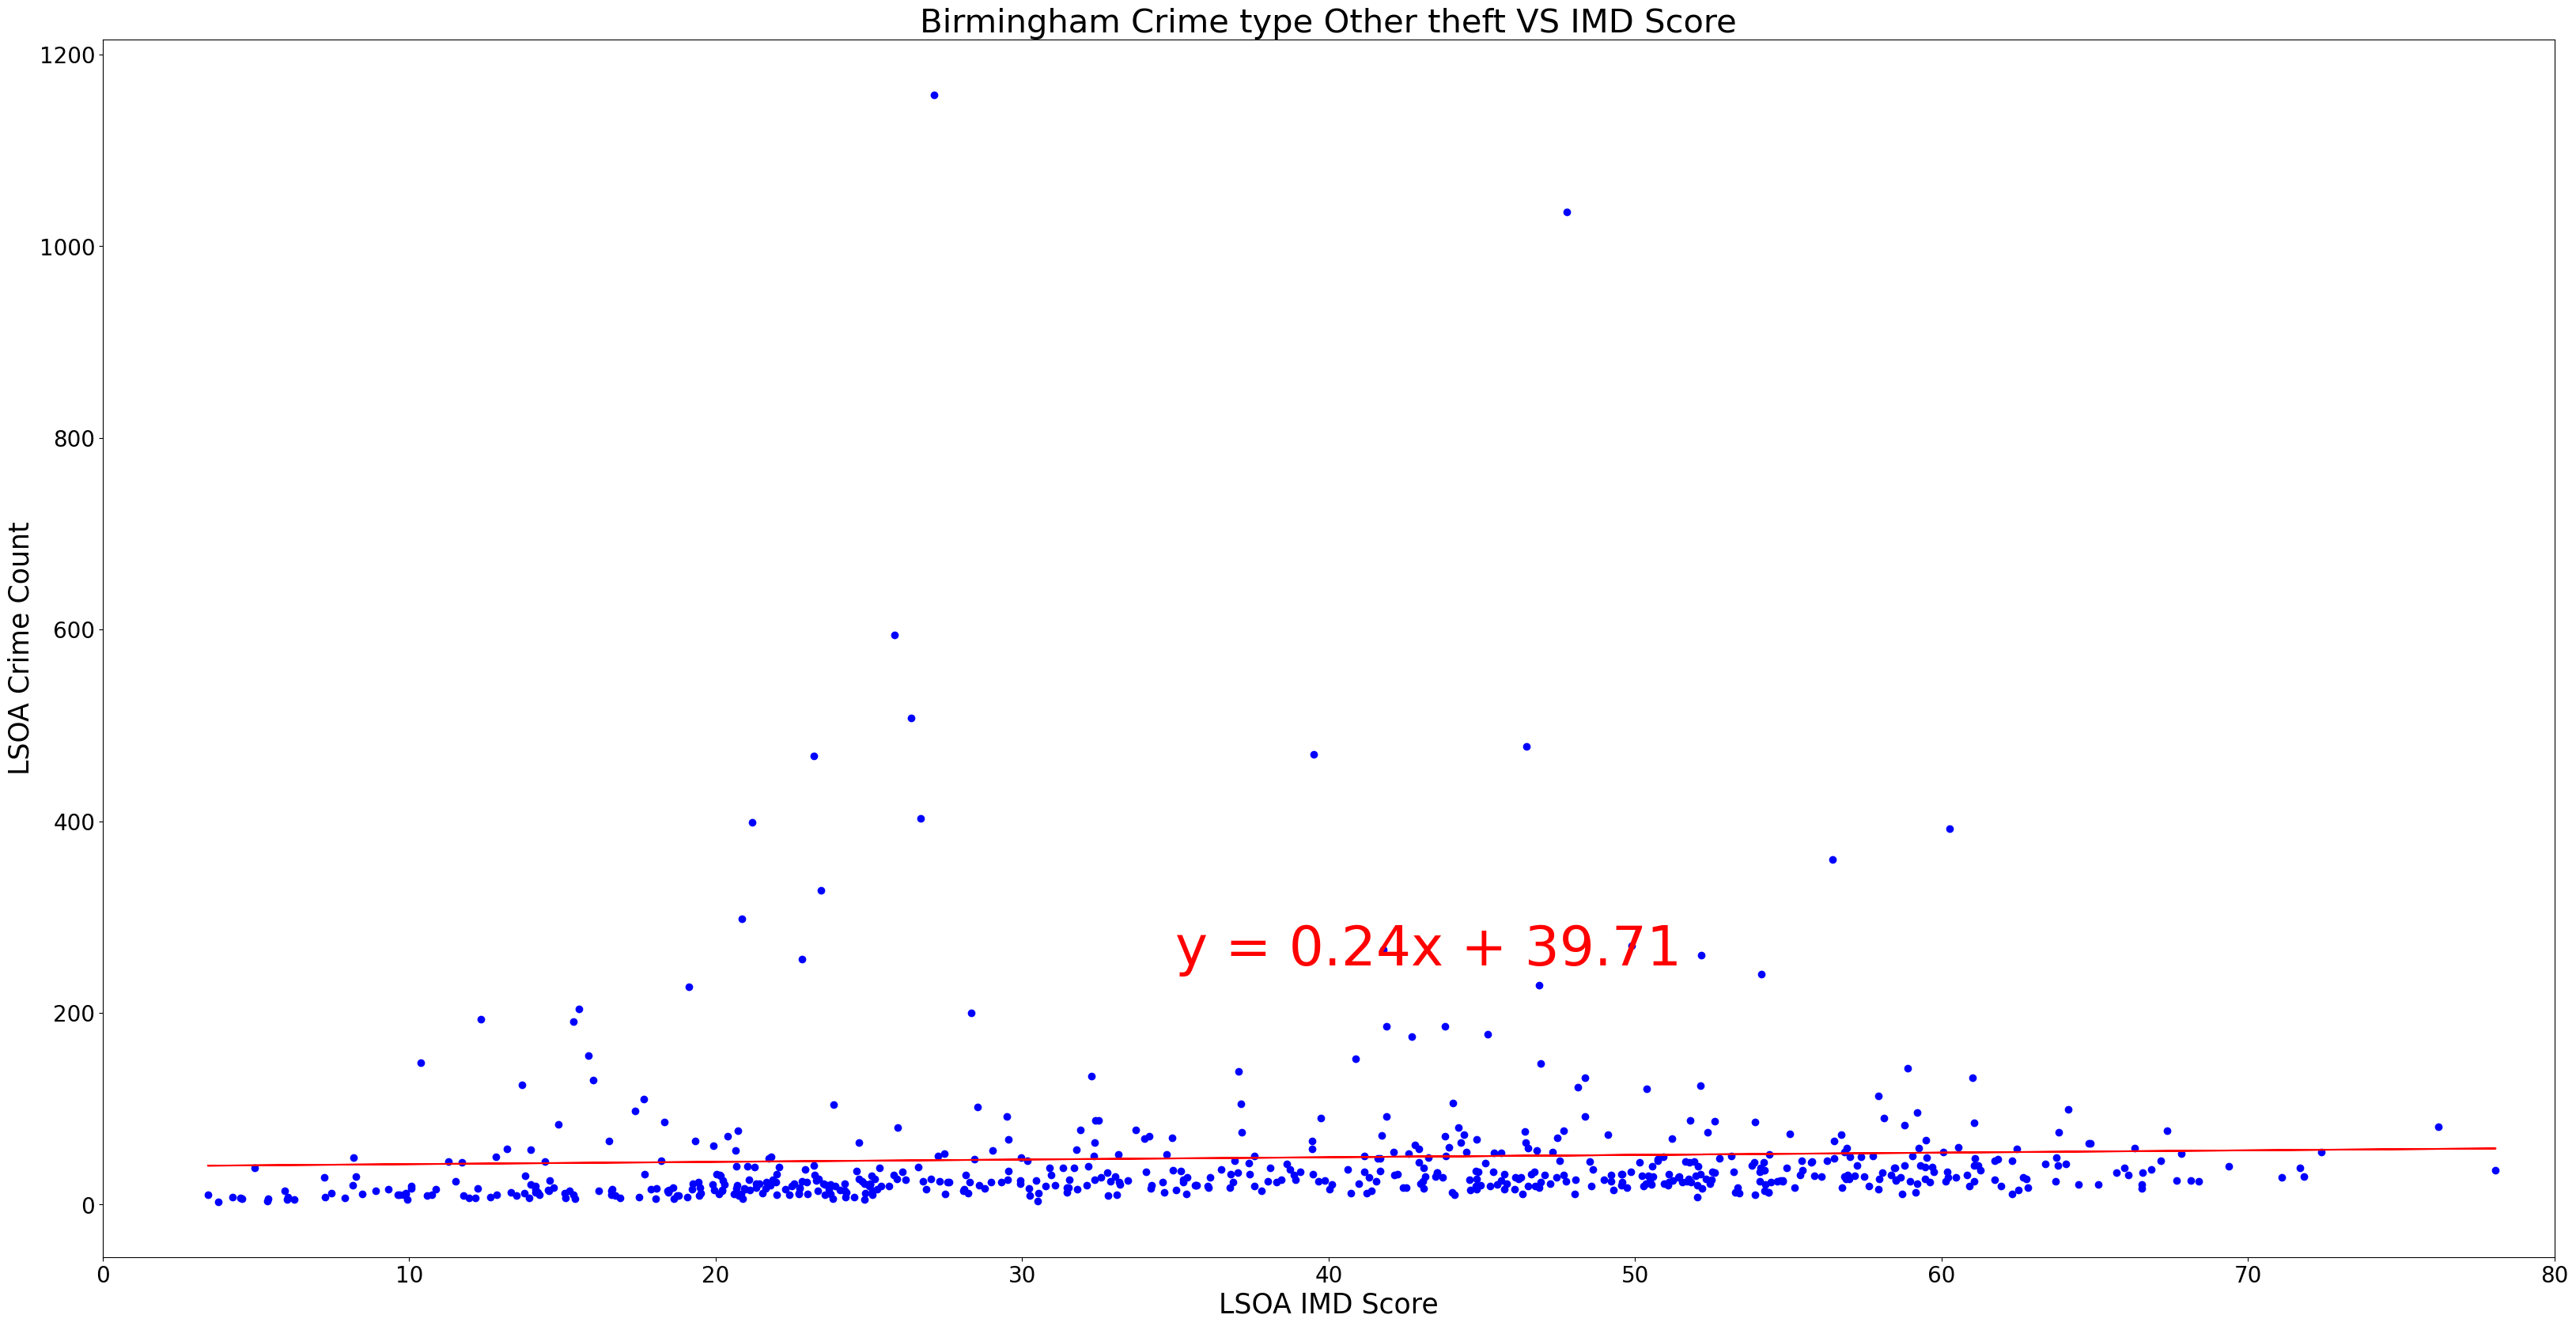

The r-value is: 0.1494498260268814


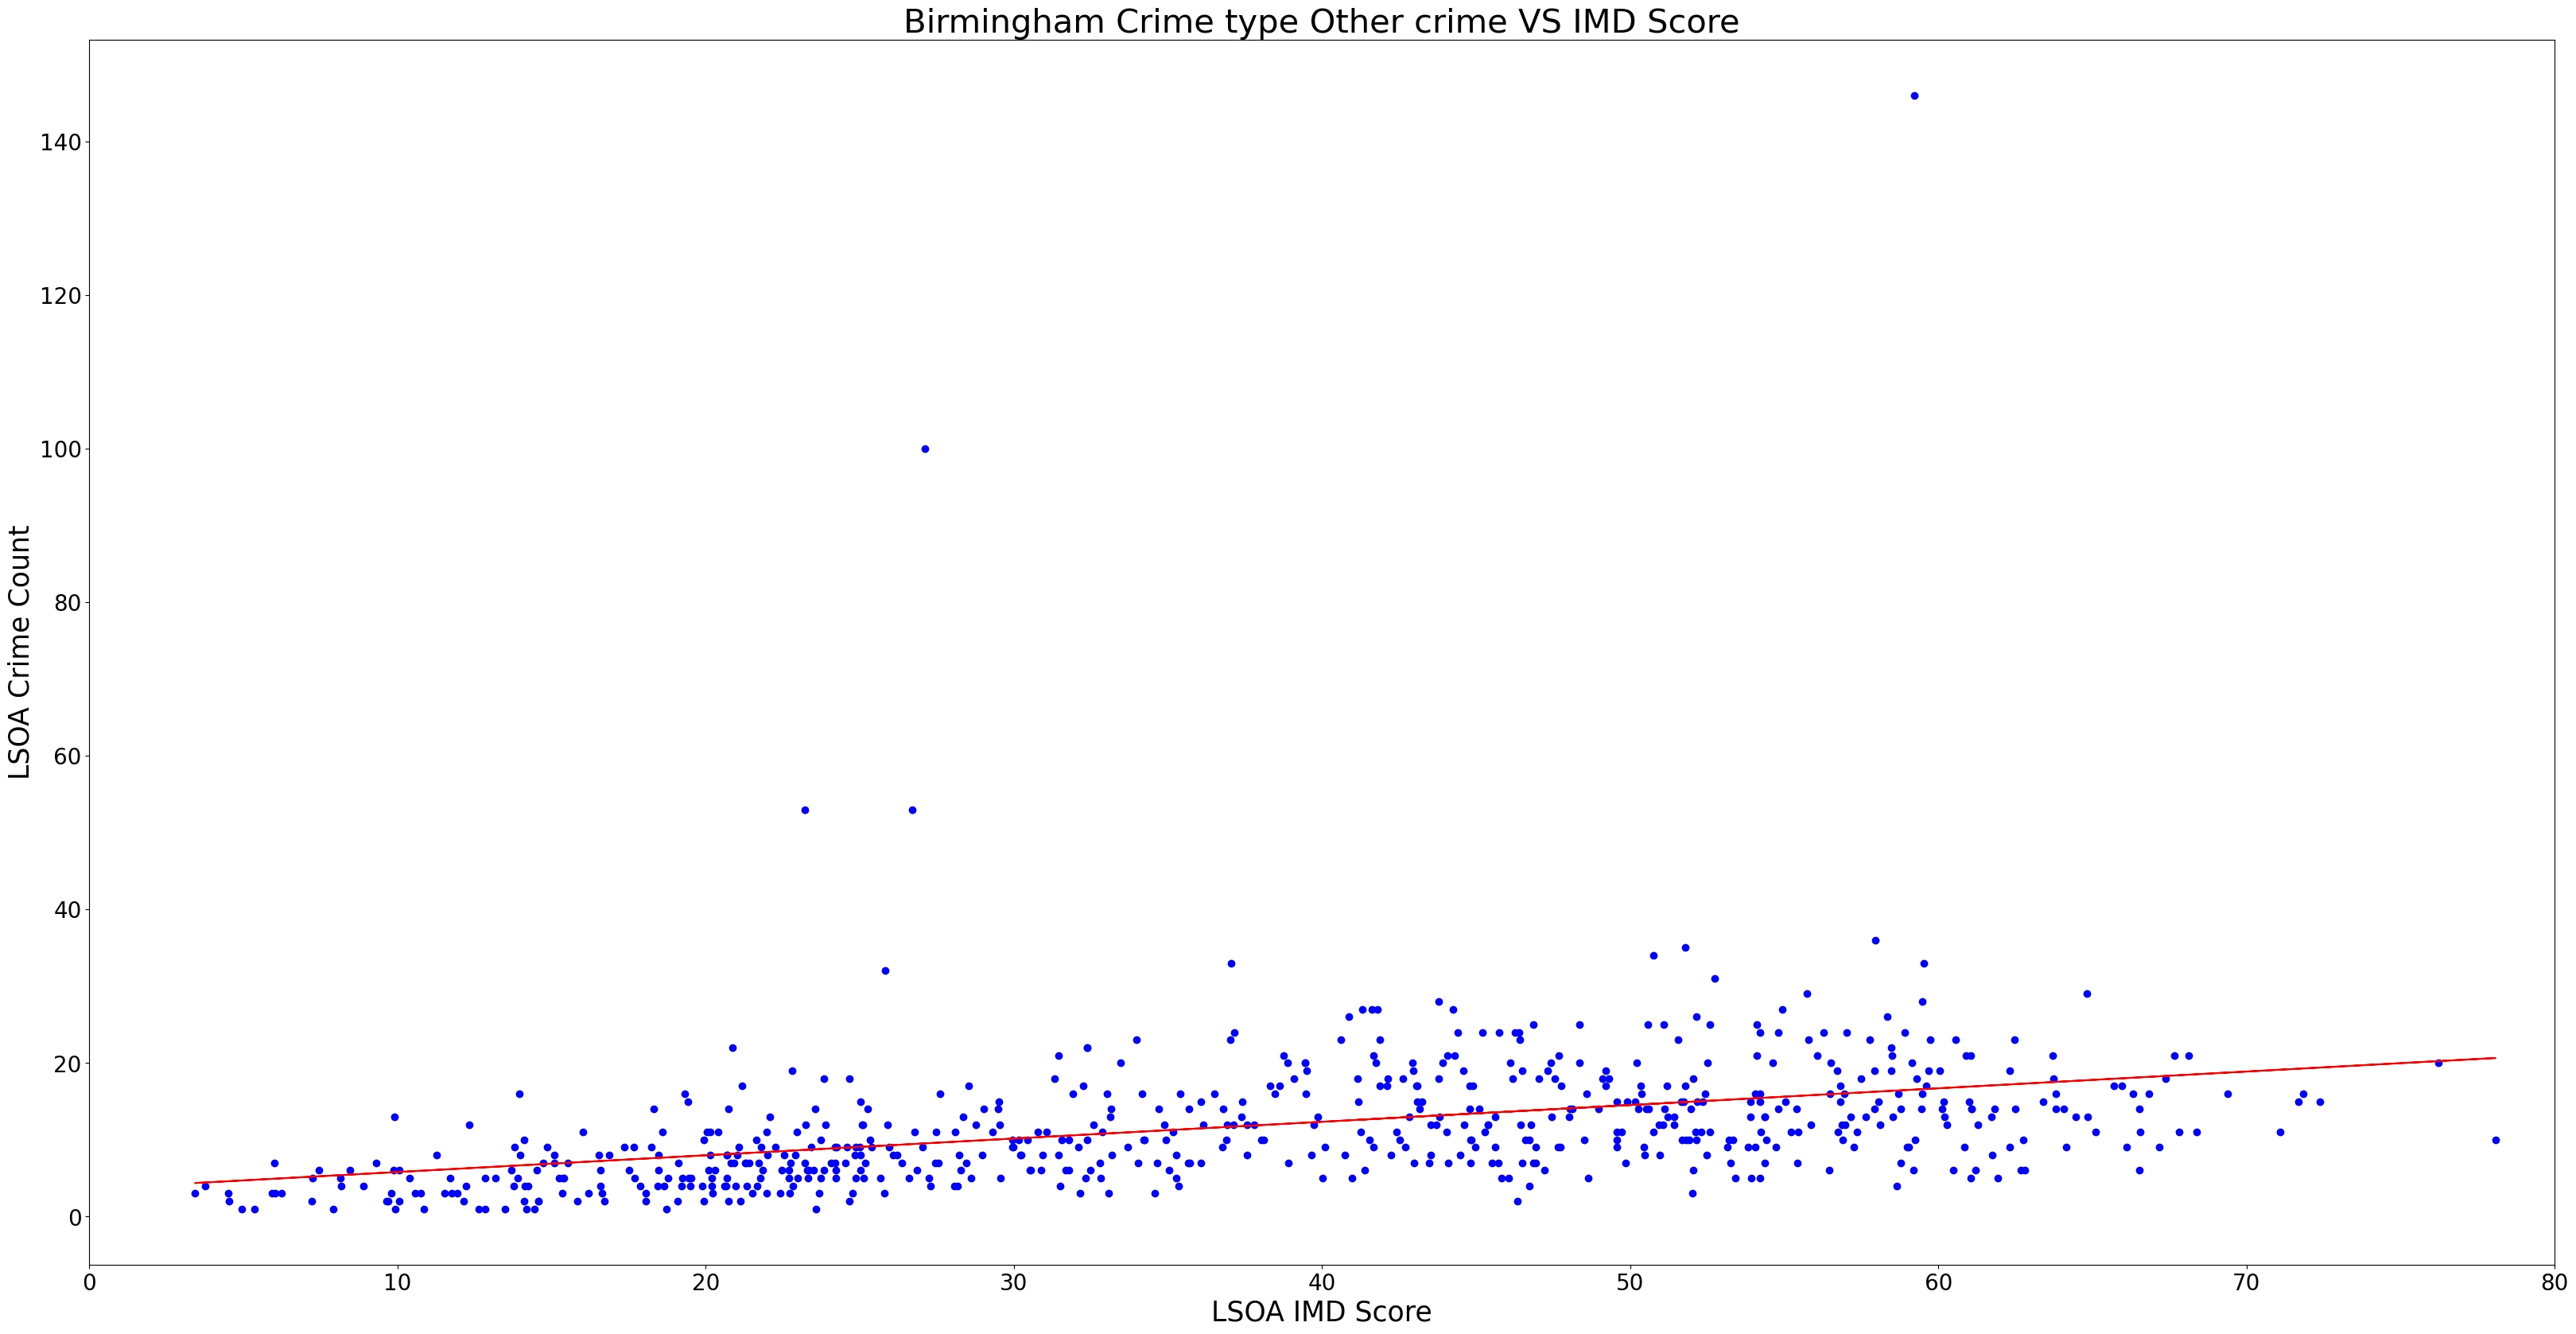

The r-value is: 0.014936148655300891


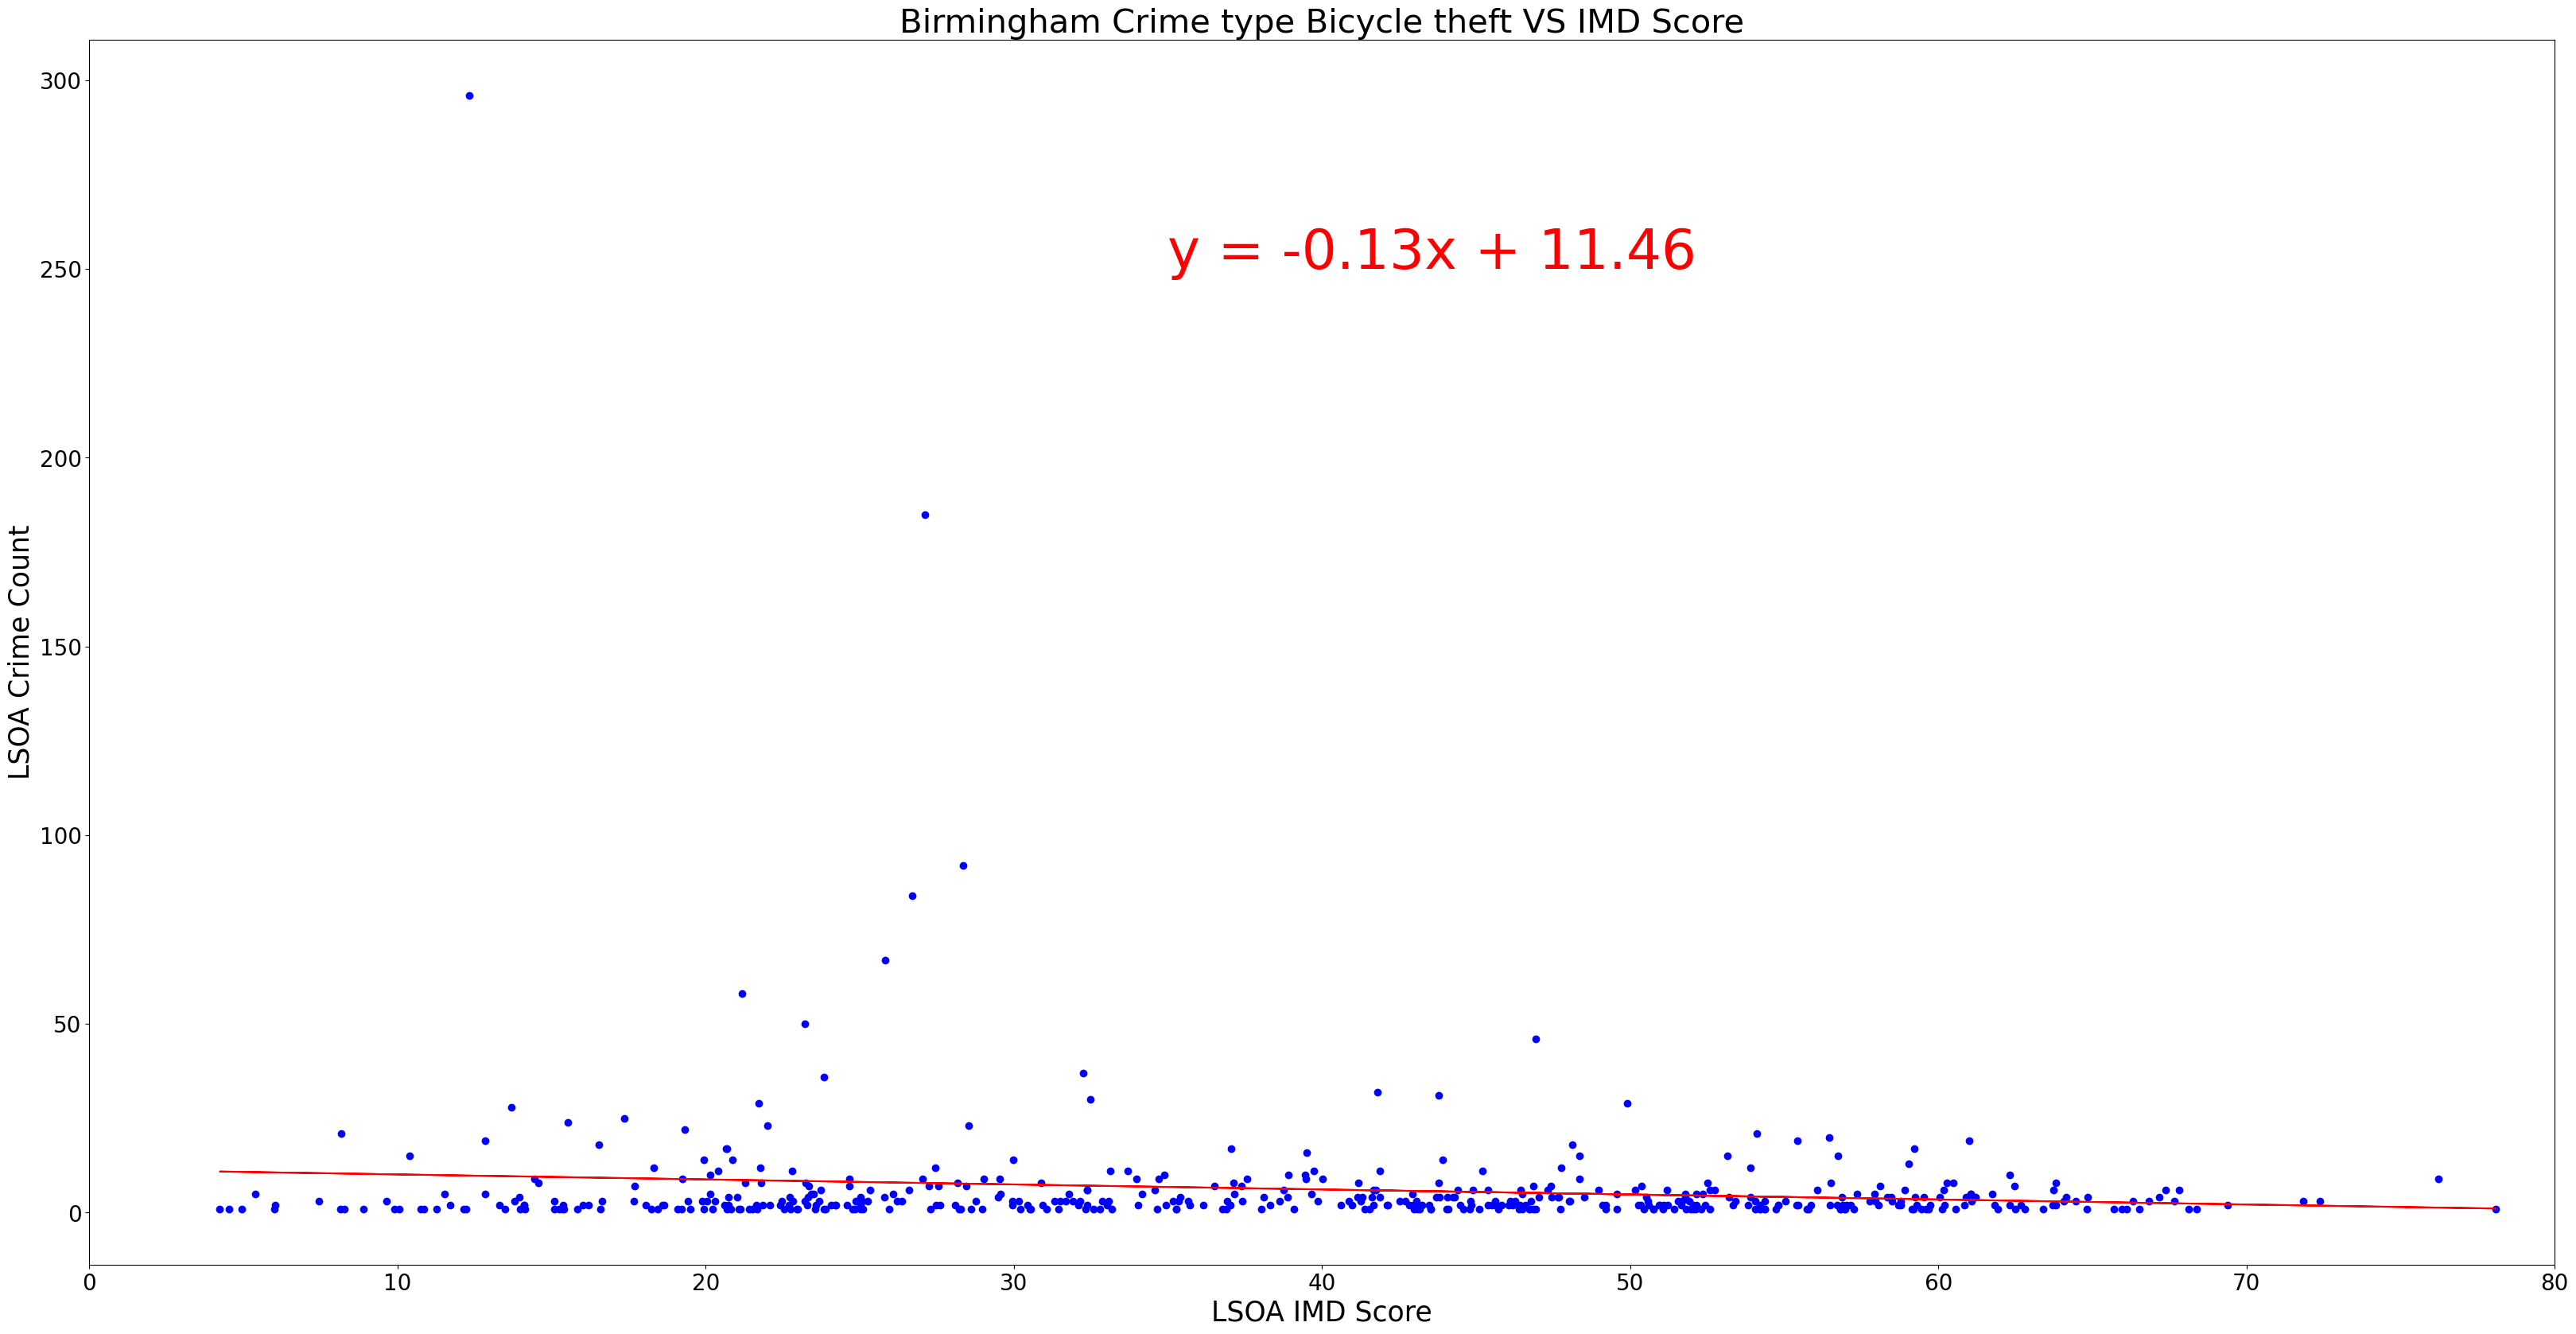

The r-value is: 0.015708932306149233


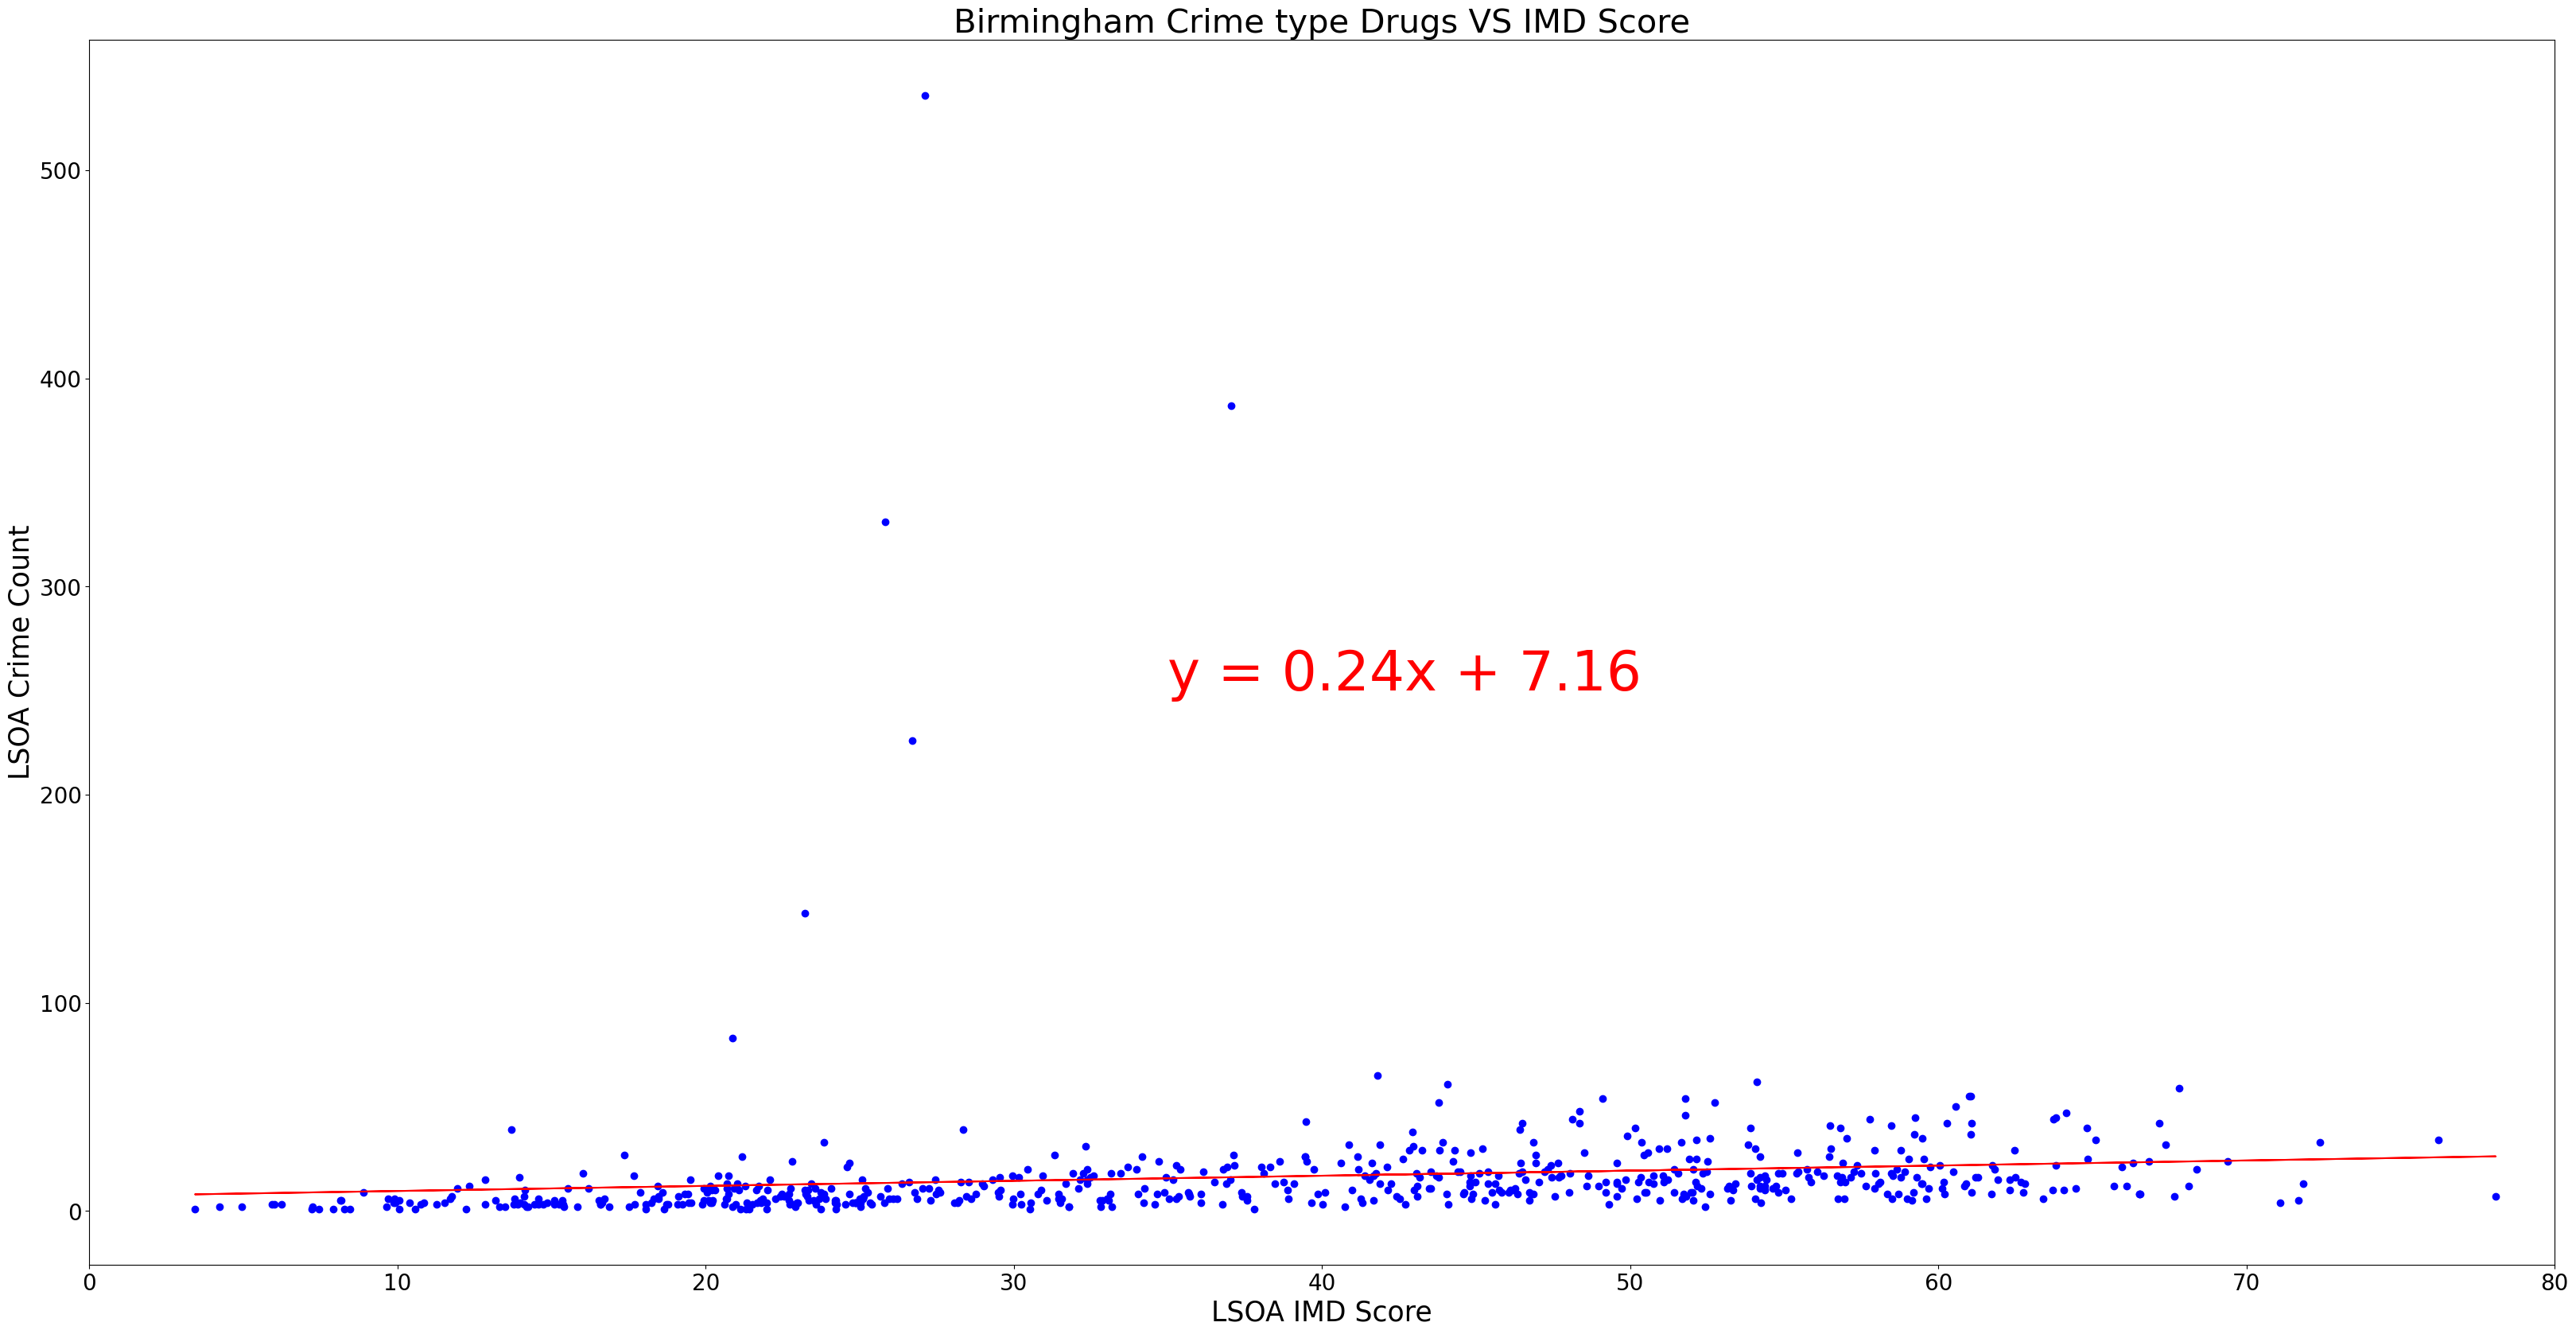

The r-value is: 0.0019213108997971162


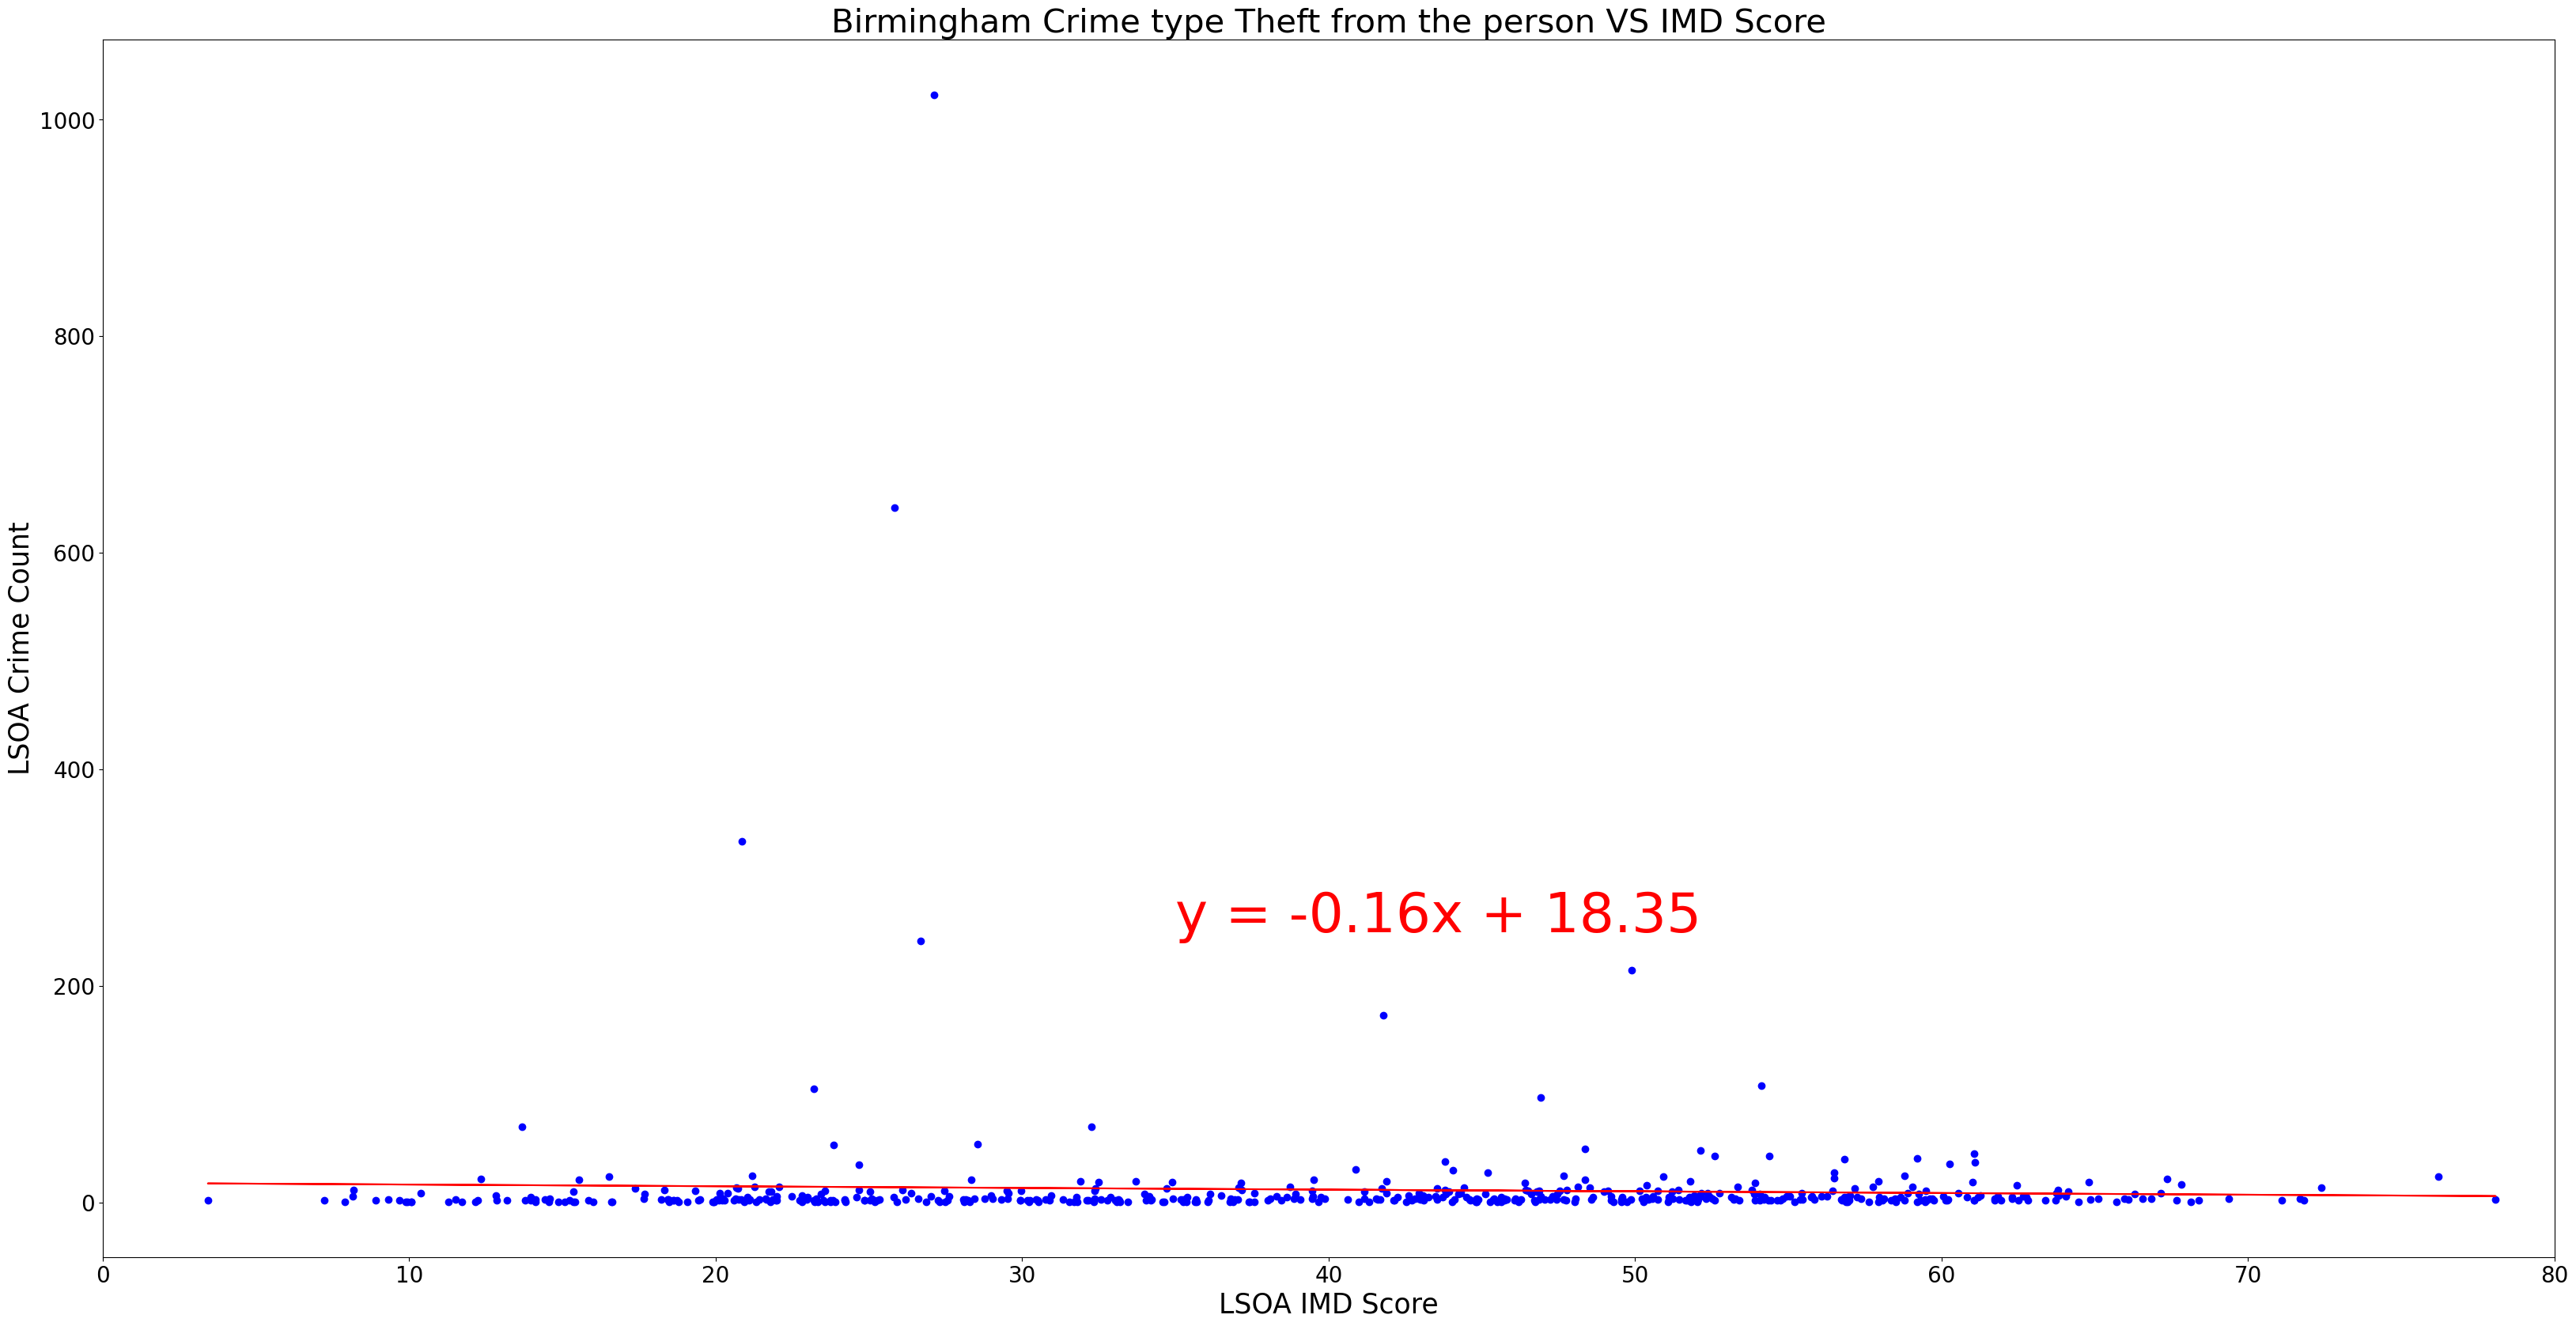

The r-value is: 0.013343964765295728


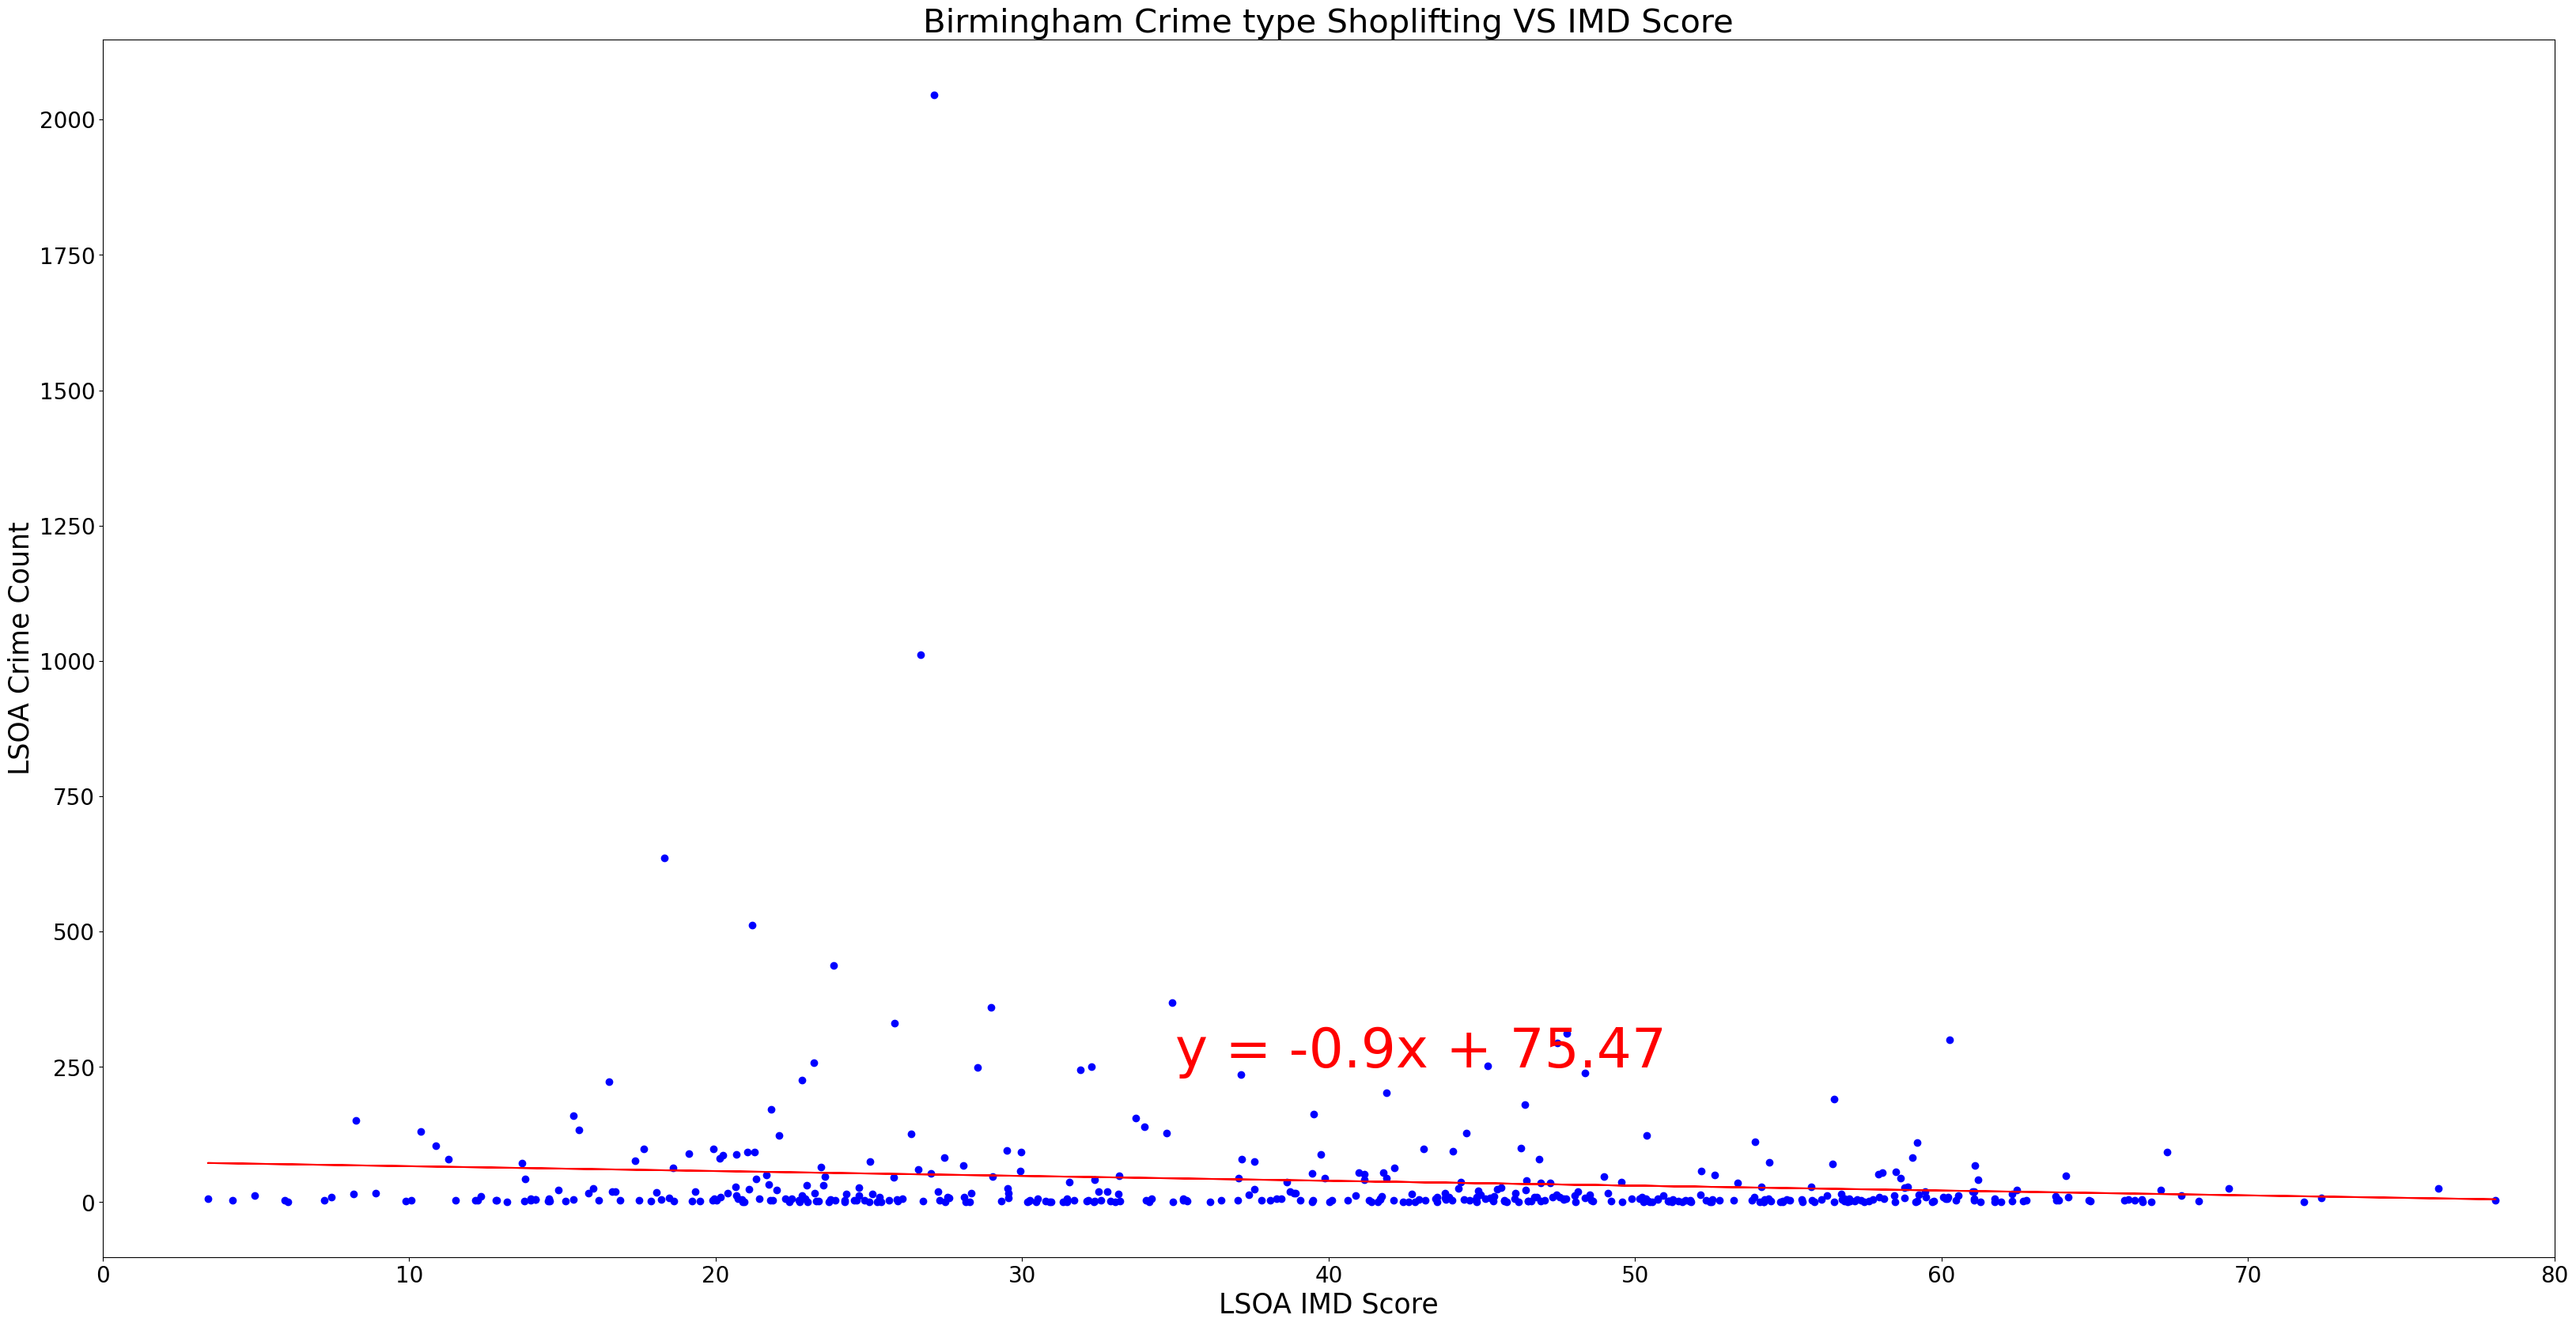

In [240]:
# Groupby LSOA


crime_type = ['Anti-social behaviour','Vehicle crime','Burglary','Criminal damage and arson','Violence and sexual offences',\
               'Possession of weapons','Public order','Robbery','Other theft','Other crime','Bicycle theft','Drugs',\
                'Theft from the person','Shoplifting']

for crime in crime_type:
     
     crime_df = Police_IMD_Merge.loc[Police_IMD_Merge["Crime type"]==crime]
     f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first'}
     LSOA_crime_type_df = crime_df.groupby(["LSOA code"]).agg(f)
     
     x_axis = LSOA_crime_type_df["Index of Multiple Deprivation (IMD) Score"]
     y_axis = LSOA_crime_type_df["LSOA code"]
     plt.title(f"Birmingham Crime type {crime} VS IMD Score", fontsize=30)
     plt.scatter(x_axis, y_axis, marker="o", color="blue")
     #plt.plot(x_axis, y_fit)
     plt.rcParams["figure.figsize"] = (40,20)
     plt.xlim(0,80)
     # plt.ylim(0, 400)
     plt.xticks(fontsize=20)
     plt.yticks(fontsize=20)
     plt.xlabel("LSOA IMD Score", fontsize=25)
     plt.ylabel("LSOA Crime Count", fontsize=25)
     plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
     plt.savefig(f"output/correlation_{crime}_vs_IMD.png")
     plt.show()


